<a href="https://colab.research.google.com/github/IvanKatorgin/Workshops-and-hackathons/blob/main/%D0%92%D0%BE%D1%80%D0%BA%D1%88%D0%BE%D0%BF_%D0%BF%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Воркшоп по аналитике данных. Команда "Три мушкетера"

Загрузка необходимых библиотек

In [ ]:
import pandas as pd, numpy as np, math, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Открытие файла

In [ ]:
df = pd.read_csv('netologia_dataset_out.csv', encoding = "utf-8", sep = ',')
df.head()

,ОГРН,Карточка компании,ОПФ,Наименование,Описание,Регион,Размер (МСП),Статус,Статус (описание),Вид деятельности (код овэд),...,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп),Адрес недостоверный: текст,Адрес недостоверный: дата,ОГРН Холдинга,Доля владения головной компании
0,307501223900033,https://datanewton.ru/contragents/307501223900033,Индивидуальный предприниматель,Москалев Павел Арнольдович,NaN,Московская область,микропредприятие,0,Действует,16.29.14,...,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,NaN
1,1136455002034,https://datanewton.ru/contragents/1136455002034,Общества с ограниченной ответственностью,"ООО ""АВГ-МАШ""",NaN,Саратовская область,микропредприятие,0,Действует,46.90,...,0.0,0.0,0.0,0.0,0,2,NaN,NaN,NaN,NaN
2,1155027011589,https://datanewton.ru/contragents/1155027011589,Общества с ограниченной ответственностью,"ООО ""АДИТЕХ""",NaN,Московская область,микропредприятие,0,Действует,24.53,...,0.0,0.0,0.0,0.0,0,3,NaN,NaN,NaN,NaN
3,1096658009568,https://datanewton.ru/contragents/1096658009568,Общества с ограниченной ответственностью,"ООО ""КАЗС""",NaN,Свердловская область,микропредприятие,0,Действует,68.20,...,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,NaN
4,1200700001314,https://datanewton.ru/contragents/1200700001314,Общества с ограниченной ответственностью,"ООО ""СТРОЙ-ОЛИМП""",NaN,Кабардино-Балкарская Республика,Не в МСП,0,Действует,41.20,...,0.0,0.0,0.0,100.0,0,0,сведения недостоверны (результаты проверки дос...,2022-02-03,NaN,NaN


Поизучаем файл

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16348 entries, 0 to 16347
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ОГРН                             16348 non-null  int64  
 1   Карточка компании                16348 non-null  object 
 2   ОПФ                              16343 non-null  object 
 3   Наименование                     16348 non-null  object 
 4   Описание                         131 non-null    object 
 5   Регион                           16348 non-null  object 
 6   Размер (МСП)                     16348 non-null  object 
 7   Статус                           16348 non-null  int64  
 8   Статус (описание)                16348 non-null  object 
 9   Вид деятельности (код овэд)      16277 non-null  object 
 10  Вид деятельности (описание))     16233 non-null  object 
 11  Должность руководителя           5255 non-null   object 
 12  ФИО руководителя  

Для дальнейшей работы оставляем столбцы: ОГРН, ОПФ, Регион, Размер (МСП), Статус, Вид деятельности (код овэд), Пол руководителя, Дата создания, Выручка в 2020, Прибыль в 2020, Выручка в 2021, Прибыль в 2021, Выручка в 2022, Прибыль в 2022, ПО в Минцифре, ПО в Роспатенте, Лицензий, Торговых знаков, Господдержка: кол-во, Господдержка: рублей, Господдержка: квадратных метров, Господдержка: часов, Господдержка: процентов, Господдержка: единиц, Численность компании (мсп)

In [ ]:
df = df[['ОГРН', 'ОПФ', 'Регион', 'Размер (МСП)', 'Статус', 'Вид деятельности (код овэд)', 'Пол руководителя', 'Дата создания', 'Выручка в 2020', 'Прибыль в 2020', 'Выручка в 2021', 'Прибыль в 2021', 'Выручка в 2022', 'Прибыль в 2022', 'ПО в Минцифре', 'ПО в Роспатенте', 'Лицензий', 'Торговых знаков', "Господдержка: кол-во", "Господдержка: рублей", "Господдержка: квадратных метров", "Господдержка: часов", "Господдержка: процентов", "Господдержка: единиц", 'Численность компании (мсп)']]
df

,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,Дата создания,Выручка в 2020,Прибыль в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
0,307501223900033,Индивидуальный предприниматель,Московская область,микропредприятие,0,16.29.14,0,2007-08-27,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
1,1136455002034,Общества с ограниченной ответственностью,Саратовская область,микропредприятие,0,46.90,1,2013-09-12,21469,3908,...,0,0,0,0,0.0,0.0,0.0,0.0,0,2
2,1155027011589,Общества с ограниченной ответственностью,Московская область,микропредприятие,0,24.53,2,2015-12-02,6803,1399,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
3,1096658009568,Общества с ограниченной ответственностью,Свердловская область,микропредприятие,0,68.20,2,2009-07-28,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
4,1200700001314,Общества с ограниченной ответственностью,Кабардино-Балкарская Республика,Не в МСП,0,41.20,2,2020-02-21,0,0,...,0,0,0,1,0.0,0.0,0.0,100.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343,323330000023802,Индивидуальный предприниматель,Владимирская область,Не в МСП,1,47.78.3,0,2023-04-28,0,0,...,0,0,0,3,0.0,0.0,1.5,0.0,0,0
16344,312334006000023,Индивидуальный предприниматель,Владимирская область,Не в МСП,1,47.78.3,0,2012-02-29,0,0,...,0,0,0,3,0.0,0.0,1.5,0.0,0,0
16345,318237500278100,Индивидуальный предприниматель,Краснодарский край,Не в МСП,1,55.20,0,2018-07-09,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
16346,320237500197160,Индивидуальный предприниматель,Краснодарский край,Не в МСП,1,55.10,0,2020-07-10,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0


Для удобства вместо столбца дата создания сделаем столбец год создания

In [ ]:
df['Дата создания'] = pd.to_datetime(df['Дата создания'])

In [ ]:
df['год создания'] = pd.DatetimeIndex(df['Дата создания']).year

Создадим два новых столбца с суммарной выручкой и прибылью за три года (2020-2022)

In [ ]:
df['sum_выручка'] = df['Выручка в 2020'] + df['Выручка в 2021'] + df['Выручка в 2022']
df['sum_выручка']

,sum_выручка
0,0
1,68849
2,21923
3,0
4,0
...,...
16343,0
16344,0
16345,0
16346,0


In [ ]:
df['sum_прибыль'] = df['Прибыль в 2020'] + df['Прибыль в 2021'] + df['Прибыль в 2022']
df['sum_прибыль']

,sum_прибыль
0,0
1,12916
2,4328
3,0
4,0
...,...
16343,0
16344,0
16345,0
16346,0


In [ ]:
df = df[['ОГРН', 'ОПФ', 'Регион', 'Размер (МСП)', 'Статус', 'Вид деятельности (код овэд)', 'Пол руководителя', 'год создания', 'Выручка в 2020', 'Выручка в 2021', 'Выручка в 2022', 'sum_выручка', 'Прибыль в 2020', 'Прибыль в 2021', 'Прибыль в 2022', 'sum_прибыль', 'ПО в Минцифре', 'ПО в Роспатенте', 'Лицензий', 'Торговых знаков', "Господдержка: кол-во", "Господдержка: рублей", "Господдержка: квадратных метров", "Господдержка: часов", "Господдержка: процентов", "Господдержка: единиц", 'Численность компании (мсп)']]
df

,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,Выручка в 2021,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
0,307501223900033,Индивидуальный предприниматель,Московская область,микропредприятие,0,16.29.14,0,2007,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
1,1136455002034,Общества с ограниченной ответственностью,Саратовская область,микропредприятие,0,46.90,1,2013,21469,27605,...,0,0,0,0,0.0,0.0,0.0,0.0,0,2
2,1155027011589,Общества с ограниченной ответственностью,Московская область,микропредприятие,0,24.53,2,2015,6803,7630,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
3,1096658009568,Общества с ограниченной ответственностью,Свердловская область,микропредприятие,0,68.20,2,2009,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
4,1200700001314,Общества с ограниченной ответственностью,Кабардино-Балкарская Республика,Не в МСП,0,41.20,2,2020,0,0,...,0,0,0,1,0.0,0.0,0.0,100.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343,323330000023802,Индивидуальный предприниматель,Владимирская область,Не в МСП,1,47.78.3,0,2023,0,0,...,0,0,0,3,0.0,0.0,1.5,0.0,0,0
16344,312334006000023,Индивидуальный предприниматель,Владимирская область,Не в МСП,1,47.78.3,0,2012,0,0,...,0,0,0,3,0.0,0.0,1.5,0.0,0,0
16345,318237500278100,Индивидуальный предприниматель,Краснодарский край,Не в МСП,1,55.20,0,2018,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
16346,320237500197160,Индивидуальный предприниматель,Краснодарский край,Не в МСП,1,55.10,0,2020,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0


In [ ]:
df.describe()

,ОГРН,Статус,Пол руководителя,год создания,Выручка в 2020,Выручка в 2021,Выручка в 2022,sum_выручка,Прибыль в 2020,Прибыль в 2021,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
count,1.634800e+04,16348.000000,16348.000000,16348.000000,1.634800e+04,1.634800e+04,1.634800e+04,1.634800e+04,1.634800e+04,1.634800e+04,...,16348.000000,16348.000000,16348.000000,16348.000000,1.634800e+04,1.634800e+04,16348.000000,16348.000000,16348.000000,16348.000000
mean,2.153200e+14,0.466724,0.419073,2016.202838,7.251436e+03,8.337639e+03,9.070473e+03,2.465955e+04,2.879851e+01,5.168782e+02,...,0.002447,0.047773,0.033032,0.769941,4.148781e+05,3.255063e+02,2.876689,0.351911,0.013213,1.770002
std,1.484536e+14,0.498907,0.669624,6.642509,1.378179e+05,1.448607e+05,2.147826e+05,4.648344e+05,2.527642e+04,3.114262e+04,...,0.091847,0.378967,0.542677,5.192153,2.069565e+07,3.073262e+04,49.249771,4.400456,0.180255,96.858074
min,1.020201e+12,0.000000,0.000000,1958.000000,0.000000e+00,-4.554300e+04,0.000000e+00,0.000000e+00,-2.632576e+06,-1.477303e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.203225e+12,0.000000,0.000000,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,3.163123e+14,0.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,3.210571e+14,1.000000,1.000000,2021.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,3.249500e+14,1.000000,3.000000,2024.000000,1.082168e+07,1.245715e+07,2.446398e+07,4.521012e+07,1.075787e+06,2.852872e+06,...,6.000000,18.000000,38.000000,575.000000,2.464745e+09,3.777449e+06,2241.000000,319.000000,9.000000,12298.000000


Работа с пропусками

In [ ]:
(df.isna().mean() * 100).round(2)

,0
ОГРН,0.00
ОПФ,0.03
Регион,0.00
Размер (МСП),0.00
Статус,0.00
Вид деятельности (код овэд),0.43
Пол руководителя,0.00
год создания,0.00
Выручка в 2020,0.00
Выручка в 2021,0.00


Имеются пропуски в столбцах ОПФ, Вид деятельности (код овэд). Строки с пропусками предлагается удалить, т.к. мы не знаем эти параметры и не сможем заполнить их какими-то средними параметрами, либо соседними значениями.

In [ ]:
df.dropna(subset=['ОПФ', 'Вид деятельности (код овэд)'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16277 entries, 0 to 16347
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ОГРН                             16277 non-null  int64  
 1   ОПФ                              16277 non-null  object 
 2   Регион                           16277 non-null  object 
 3   Размер (МСП)                     16277 non-null  object 
 4   Статус                           16277 non-null  int64  
 5   Вид деятельности (код овэд)      16277 non-null  object 
 6   Пол руководителя                 16277 non-null  int64  
 7   год создания                     16277 non-null  int32  
 8   Выручка в 2020                   16277 non-null  int64  
 9   Выручка в 2021                   16277 non-null  int64  
 10  Выручка в 2022                   16277 non-null  int64  
 11  sum_выручка                      16277 non-null  int64  
 12  Прибыль в 2020         

<ipython-input-12-09e1a2d65963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['ОПФ', 'Вид деятельности (код овэд)'], inplace=True)


Оставим только те компании, у которых есть какая-либо выручка. Удалим нулевые значения в столбцах с выручкой

In [ ]:
df = df.loc[df['sum_выручка'] > 0].reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            1797 non-null   int64  
 1   ОГРН                             1797 non-null   int64  
 2   ОПФ                              1797 non-null   object 
 3   Регион                           1797 non-null   object 
 4   Размер (МСП)                     1797 non-null   object 
 5   Статус                           1797 non-null   int64  
 6   Вид деятельности (код овэд)      1797 non-null   object 
 7   Пол руководителя                 1797 non-null   int64  
 8   год создания                     1797 non-null   int32  
 9   Выручка в 2020                   1797 non-null   int64  
 10  Выручка в 2021                   1797 non-null   int64  
 11  Выручка в 2022                   1797 non-null   int64  
 12  sum_выручка         

In [ ]:
print(df['sum_выручка'].min())

1


Проверим, есть ли выбросы в данных

In [ ]:
df[['ОПФ']].value_counts()

,count
ОПФ,
Общества с ограниченной ответственностью,1679
Непубличные акционерные общества,30
Автономные некоммерческие организации,11
Муниципальные унитарные предприятия,11
Частные учреждения,11
Общественные организации,8
Товарищества собственников жилья,7
Жилищные или жилищно-строительные кооперативы,6
Сельскохозяйственные производственные кооперативы,5


In [ ]:
df[['Регион']].value_counts()

,count
Регион,
Москва,344
Санкт-Петербург,148
Московская область,114
Новосибирская область,70
Челябинская область,56
...,...
Луганская Народная Республика,1
Еврейская автономная область,1
Чеченская Республика,1


In [ ]:
df[['Размер (МСП)']].value_counts()

,count
Размер (МСП),
микропредприятие,1344
Не в МСП,279
малое предприятие,151
среднее предприятие,23


In [ ]:
df[['Статус']].value_counts()

,count
Статус,
0,1670
1,127


In [ ]:
df[['Вид деятельности (код овэд)']].value_counts()

,count
Вид деятельности (код овэд),
41.20,93
46.90,57
68.20.2,49
56.10,33
49.41,30
...,...
47.25.11,1
21.20.2,1
47.21,1


In [ ]:
df[['Пол руководителя']].value_counts()

,count
Пол руководителя,
1,1222
2,541
0,29
3,5


In [ ]:
df[['год создания']].value_counts()

,count
год создания,
2021,141
2019,123
2016,118
2020,113
2015,113
2017,112
2014,109
2018,104
2013,79


In [ ]:
df[['ПО в Минцифре']].value_counts()

,count
ПО в Минцифре,
0,1791
1,5
3,1


In [ ]:
df[['ПО в Роспатенте']].value_counts()

,count
ПО в Роспатенте,
0,1786
1,4
2,3
3,1
4,1
5,1
6,1


In [ ]:
df[['Лицензий']].value_counts()

,count
Лицензий,
0,1545
1,163
2,56
3,16
5,5
4,4
6,3
9,2
7,1


In [ ]:
df[['Торговых знаков']].value_counts()

,count
Торговых знаков,
0,1705
1,55
2,12
3,6
4,5
6,3
8,3
5,2
10,2


In [ ]:
df[['Господдержка: кол-во']].value_counts()

,count
Господдержка: кол-во,
0,1171
1,184
2,131
3,80
4,54
5,32
6,21
7,21
9,15


In [ ]:
df[['Господдержка: рублей']].value_counts()

,count
Господдержка: рублей,
0.000000e+00,1506
2.426000e+04,12
4.852000e+04,9
1.213000e+05,5
5.000000e+06,5
...,...
1.790880e+05,1
1.940800e+05,1
1.995600e+05,1


In [ ]:
df[['Господдержка: квадратных метров']].value_counts()

,count
Господдержка: квадратных метров,
0.0,1790
13.5,1
32.2,1
38.4,1
40.2,1
219.6,1
412.9,1
1070.4,1


In [ ]:
df[['Господдержка: часов']].value_counts()

,count
Господдержка: часов,
0.00,1433
1.00,77
2.00,39
3.00,19
4.00,19
...,...
0.30,1
0.41,1
9.50,1


In [ ]:
df[['Господдержка: процентов']].value_counts()

,count
Господдержка: процентов,
0.00,1586
7.00,102
13.00,18
3.50,9
11.00,9
10.50,5
19.00,5
4.00,5
100.00,4


In [ ]:
df[['Господдержка: единиц']].value_counts()

,count
Господдержка: единиц,
0,1764
1,21
2,6
3,3
4,2
5,1


In [ ]:
df[['Численность компании (мсп)']].value_counts()

,count
Численность компании (мсп),
1,506
0,366
2,218
3,133
4,90
...,...
89,1
92,1
95,1


Text(0.5, 1.0, 'год создания')

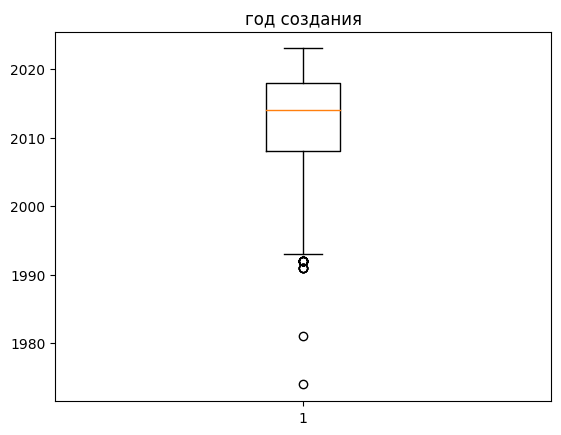

In [ ]:
plt.boxplot(df['год создания'])
plt.title('год создания')

Text(0.5, 1.0, 'sum_выручка')

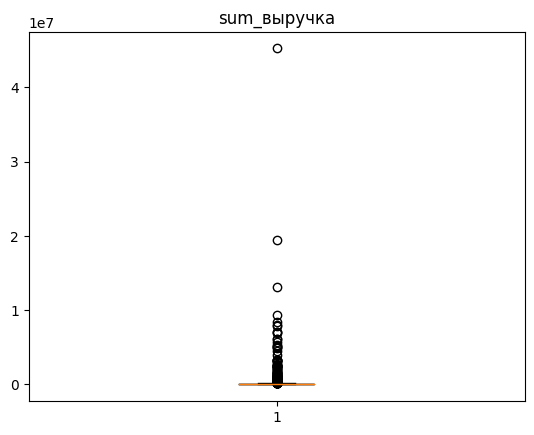

In [ ]:
plt.boxplot(df['sum_выручка'])
plt.title('sum_выручка')

Text(0.5, 1.0, 'sum_прибыль')

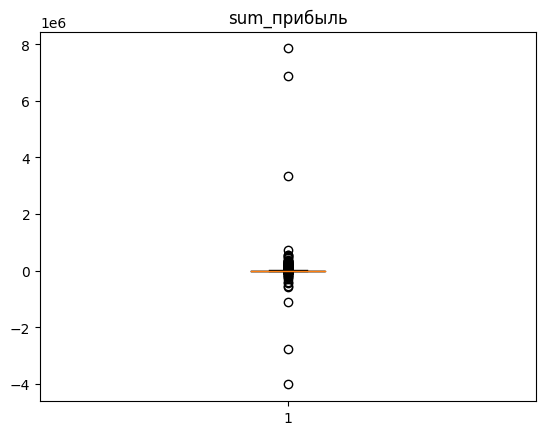

In [ ]:
plt.boxplot(df['sum_прибыль'])
plt.title('sum_прибыль')

Text(0.5, 1.0, 'ПО в Минцифре')

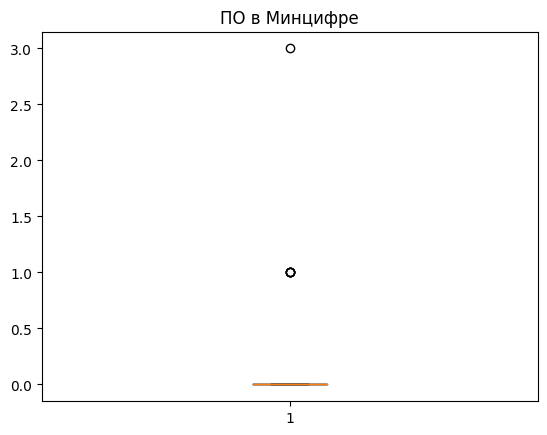

In [ ]:
plt.boxplot(df['ПО в Минцифре'])
plt.title('ПО в Минцифре')

Text(0.5, 1.0, 'ПО в Роспатенте')

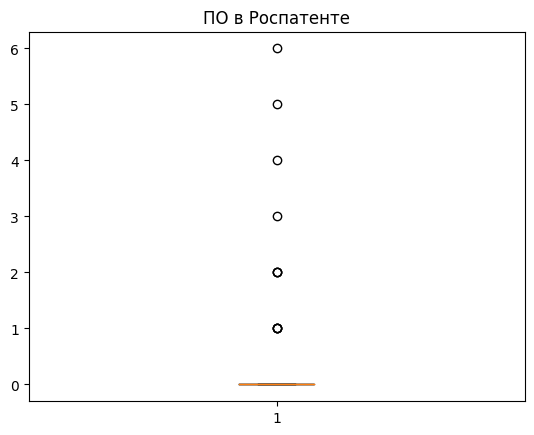

In [ ]:
plt.boxplot(df['ПО в Роспатенте'])
plt.title('ПО в Роспатенте')

Text(0.5, 1.0, 'Лицензий')

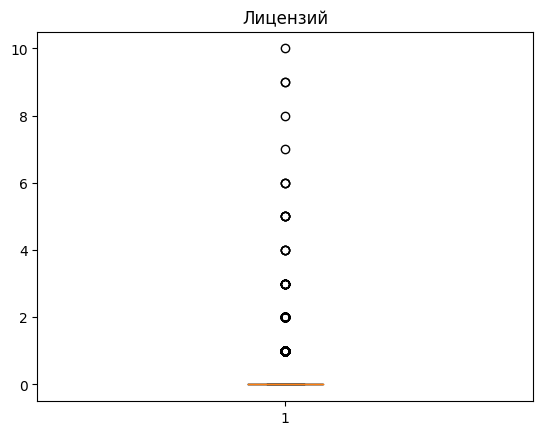

In [ ]:
plt.boxplot(df['Лицензий'])
plt.title('Лицензий')

Text(0.5, 1.0, 'Торговых знаков')

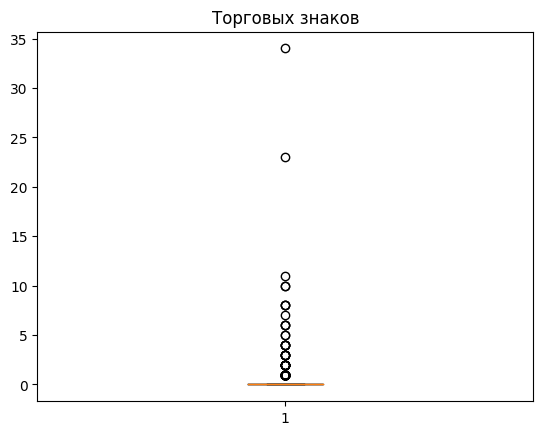

In [ ]:
plt.boxplot(df['Торговых знаков'])
plt.title('Торговых знаков')

Text(0.5, 1.0, 'Господдержка: кол-во')

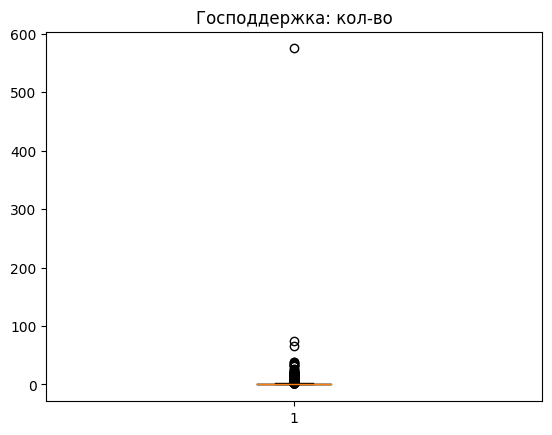

In [ ]:
plt.boxplot(df['Господдержка: кол-во'])
plt.title('Господдержка: кол-во')

Text(0.5, 1.0, 'Господдержка: рублей')

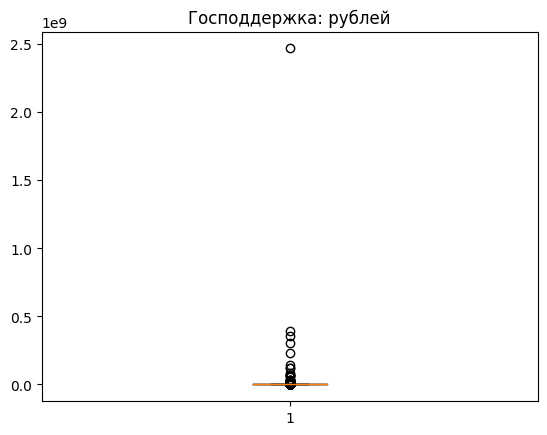

In [ ]:
plt.boxplot(df['Господдержка: рублей'])
plt.title('Господдержка: рублей')

Text(0.5, 1.0, 'Господдержка: квадратных метров')

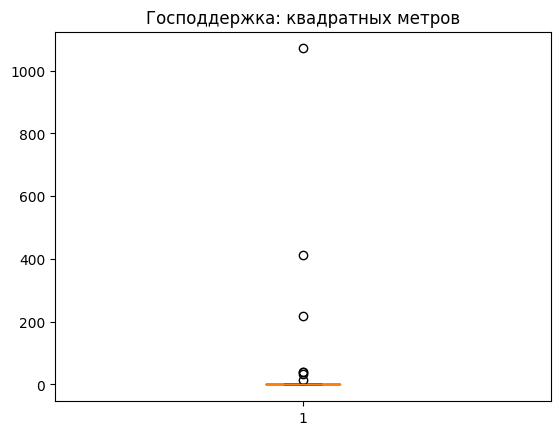

In [ ]:
plt.boxplot(df['Господдержка: квадратных метров'])
plt.title('Господдержка: квадратных метров')

Text(0.5, 1.0, 'Господдержка: часов')

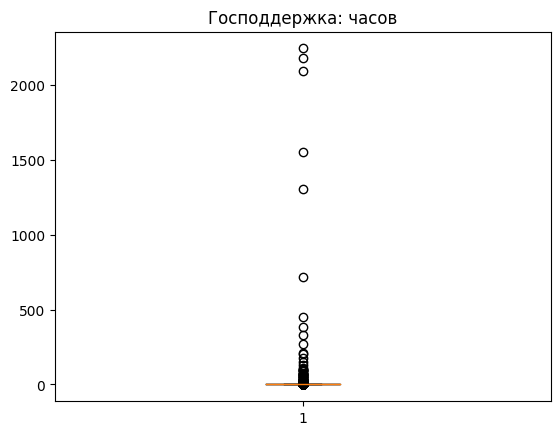

In [ ]:
plt.boxplot(df['Господдержка: часов'])
plt.title('Господдержка: часов')

Text(0.5, 1.0, 'Господдержка: процентов')

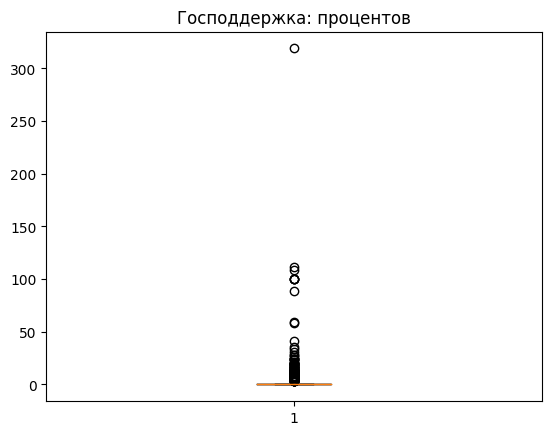

In [ ]:
plt.boxplot(df['Господдержка: процентов'])
plt.title('Господдержка: процентов')

Text(0.5, 1.0, 'Господдержка: единиц')

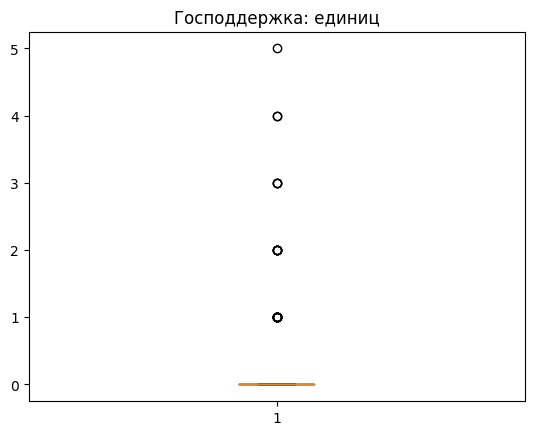

In [ ]:
plt.boxplot(df['Господдержка: единиц'])
plt.title('Господдержка: единиц')

Text(0.5, 1.0, 'Численность компании (мсп)')

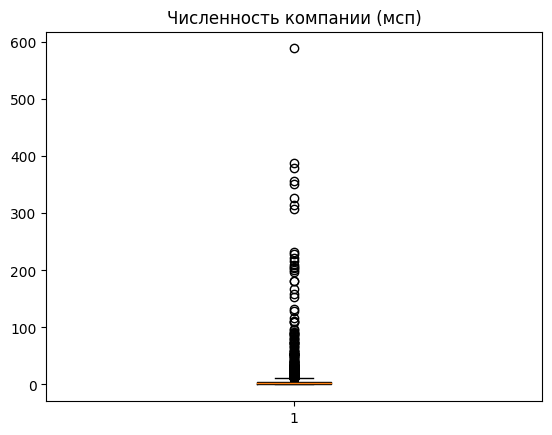

In [ ]:
plt.boxplot(df['Численность компании (мсп)'])
plt.title('Численность компании (мсп)')

In [ ]:
print(df['год создания'].mean())
print(df['год создания'].median())
print(df['год создания'].mode()[0])
print(df['год создания'].std())
print(df['год создания'].var())

2012.6727879799666
2014.0
2021
7.3089474155354655
53.42071232306256


In [ ]:
print(df['sum_выручка'].mean())
print(df['sum_выручка'].median())
print(df['sum_выручка'].mode()[0])
print(df['sum_выручка'].std())
print(df['sum_выручка'].var())

224337.3939899833
19211.0
7
1386302.8077444194
1921835474760.0608


In [ ]:
print(df['sum_прибыль'].mean())
print(df['sum_прибыль'].median())
print(df['sum_прибыль'].mode()[0])
print(df['sum_прибыль'].std())
print(df['sum_прибыль'].var())

13098.705063995549
356.0
0
289405.047343955
83755281428.15685


In [ ]:
print(df['ПО в Минцифре'].mean())
print(df['ПО в Минцифре'].median())
print(df['ПО в Минцифре'].mode()[0])
print(df['ПО в Минцифре'].std())
print(df['ПО в Минцифре'].var())

0.004451864218141347
0.0
0
0.08817749198389307
0.0077752700925695275


In [ ]:
print(df['ПО в Роспатенте'].mean())
print(df['ПО в Роспатенте'].median())
print(df['ПО в Роспатенте'].mode()[0])
print(df['ПО в Роспатенте'].std())
print(df['ПО в Роспатенте'].var())

0.015581524763494713
0.0
0
0.23780234220233523
0.05654995395691655


In [ ]:
print(df['Лицензий'].mean())
print(df['Лицензий'].median())
print(df['Лицензий'].mode()[0])
print(df['Лицензий'].std())
print(df['Лицензий'].var())

0.23650528658875905
0.0
0
0.7834895861628993
0.6138559316257113


In [ ]:
print(df['Торговых знаков'].mean())
print(df['Торговых знаков'].median())
print(df['Торговых знаков'].mode()[0])
print(df['Торговых знаков'].std())
print(df['Торговых знаков'].var())

0.14691151919866444
0.0
0
1.2039317916188503
1.4494517588705746


In [ ]:
print(df['Господдержка: кол-во'].mean())
print(df['Господдержка: кол-во'].median())
print(df['Господдержка: кол-во'].mode()[0])
print(df['Господдержка: кол-во'].std())
print(df['Господдержка: кол-во'].var())

1.9499165275459098
0.0
0
14.259476833275826
203.33267955873


In [ ]:
print(df['Господдержка: рублей'].mean())
print(df['Господдержка: рублей'].median())
print(df['Господдержка: рублей'].mode()[0])
print(df['Господдержка: рублей'].std())
print(df['Господдержка: рублей'].var())

2938463.1412966056
0.0
0.0
60513552.80766784
3661890073406403.5


In [ ]:
print(df['Господдержка: квадратных метров'].mean())
print(df['Господдержка: квадратных метров'].median())
print(df['Господдержка: квадратных метров'].mode()[0])
print(df['Господдержка: квадратных метров'].std())
print(df['Господдержка: квадратных метров'].var())

1.0168057874234837
0.0
0.0
27.58786845304321
761.0904857824167


In [ ]:
print(df['Господдержка: часов'].mean())
print(df['Господдержка: часов'].median())
print(df['Господдержка: часов'].mode()[0])
print(df['Господдержка: часов'].std())
print(df['Господдержка: часов'].var())

8.681713967723985
0.0
0.0
104.09775602597874
10836.342809644193


In [ ]:
print(df['Господдержка: процентов'].mean())
print(df['Господдержка: процентов'].median())
print(df['Господдержка: процентов'].mode()[0])
print(df['Господдержка: процентов'].std())
print(df['Господдержка: процентов'].var())

1.7823984418475238
0.0
0.0
10.65738122568041
113.5797745894853


In [ ]:
print(df['Господдержка: единиц'].mean())
print(df['Господдержка: единиц'].median())
print(df['Господдержка: единиц'].mode()[0])
print(df['Господдержка: единиц'].std())
print(df['Господдержка: единиц'].var())

0.03060656649972176
0.0
0
0.26624987723630833
0.07088899712834927


In [ ]:
print(df['Численность компании (мсп)'].mean())
print(df['Численность компании (мсп)'].median())
print(df['Численность компании (мсп)'].mode()[0])
print(df['Численность компании (мсп)'].std())
print(df['Численность компании (мсп)'].var())

8.906510851419032
2.0
1
33.19680712421341
1102.028003242226


Явных выбросов не обнаружено, но имеются аномалии в столбце "пол руководителя". После ручной проверки исходного файла оказалось, что 0 - по всей видимости пол не известен, 1 - мужчина, 2 - женщина и 3 - тоже женщина.

Для дальнейших исследований предлагается значения 0 - удалить, а 3 заменить на 2

In [ ]:
df = df[df['Пол руководителя'].isin([1, 2, 3])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1768 entries, 0 to 1796
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            1768 non-null   int64  
 1   ОГРН                             1768 non-null   int64  
 2   ОПФ                              1768 non-null   object 
 3   Регион                           1768 non-null   object 
 4   Размер (МСП)                     1768 non-null   object 
 5   Статус                           1768 non-null   int64  
 6   Вид деятельности (код овэд)      1768 non-null   object 
 7   Пол руководителя                 1768 non-null   int64  
 8   год создания                     1768 non-null   int32  
 9   Выручка в 2020                   1768 non-null   int64  
 10  Выручка в 2021                   1768 non-null   int64  
 11  Выручка в 2022                   1768 non-null   int64  
 12  sum_выручка              

In [ ]:
df['Пол руководителя'] = df['Пол руководителя']. replace (3, 2)

In [ ]:
df[['Пол руководителя']].value_counts()

,count
Пол руководителя,
1,1222
2,546


Также для удобства предлагается заменить на числовые признаки значения в столбце размер МСП: Не в МСП	- 0, микропредприятие	- 1, малое предприятие	- 2 и среднее предприятие	- 3

In [ ]:
df['Размер (МСП)'] = df['Размер (МСП)']. replace ('микропредприятие', 0)

In [ ]:
df['Размер (МСП)'] = df['Размер (МСП)']. replace ('малое предприятие', 1)

In [ ]:
df['Размер (МСП)'] = df['Размер (МСП)']. replace ('среднее предприятие', 2)

In [ ]:
df['Размер (МСП)'] = df['Размер (МСП)']. replace ('Не в МСП', 3)

In [ ]:
df[['Размер (МСП)']].value_counts()

,count
Размер (МСП),
0,1330
3,267
1,148
2,23


In [ ]:
(df.isna().mean() * 100).round(2)

,0
index,0.0
ОГРН,0.0
ОПФ,0.0
Регион,0.0
Размер (МСП),0.0
Статус,0.0
Вид деятельности (код овэд),0.0
Пол руководителя,0.0
год создания,0.0
Выручка в 2020,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1768 entries, 0 to 1796
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            1768 non-null   int64  
 1   ОГРН                             1768 non-null   int64  
 2   ОПФ                              1768 non-null   object 
 3   Регион                           1768 non-null   object 
 4   Размер (МСП)                     1768 non-null   int64  
 5   Статус                           1768 non-null   int64  
 6   Вид деятельности (код овэд)      1768 non-null   object 
 7   Пол руководителя                 1768 non-null   int64  
 8   год создания                     1768 non-null   int32  
 9   Выручка в 2020                   1768 non-null   int64  
 10  Выручка в 2021                   1768 non-null   int64  
 11  Выручка в 2022                   1768 non-null   int64  
 12  sum_выручка              

In [ ]:
df.describe()

,index,ОГРН,Размер (МСП),Статус,Пол руководителя,год создания,Выручка в 2020,Выручка в 2021,Выручка в 2022,sum_выручка,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
count,1768.000000,1.768000e+03,1768.000000,1768.000000,1768.000000,1768.000000,1.768000e+03,1.768000e+03,1.768000e+03,1.768000e+03,...,1768.000000,1768.000000,1768.000000,1768.000000,1.768000e+03,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000
mean,7953.254525,1.243781e+12,0.562783,0.069005,1.308824,2012.650452,6.242797e+04,7.117338e+04,8.211548e+04,2.157168e+05,...,0.015837,0.239819,0.143100,1.968326,2.978572e+06,1.033484,8.818937,1.798060,0.031109,8.733597
std,4717.743755,6.469438e+11,1.085749,0.253534,0.462139,7.316902,3.984294e+05,4.097005e+05,6.478027e+05,1.370428e+06,...,0.239737,0.789116,1.185843,14.373942,6.100687e+07,27.813023,104.942841,10.736655,0.268397,33.176003
min,1.000000,1.020202e+12,0.000000,0.000000,1.000000,1974.000000,0.000000e+00,-4.554300e+04,0.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3771.750000,1.087671e+12,0.000000,0.000000,1.000000,2008.000000,8.975000e+01,4.992500e+02,5.660000e+02,3.842500e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7937.000000,1.152522e+12,0.000000,0.000000,1.000000,2014.000000,3.280500e+03,4.728500e+03,5.662500e+03,1.876000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
75%,11865.250000,1.195081e+12,0.000000,0.000000,2.000000,2018.000000,2.106350e+04,2.627375e+04,3.120150e+04,8.703200e+04,...,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000
max,16233.000000,5.177746e+12,3.000000,1.000000,2.000000,2023.000000,1.082168e+07,1.245715e+07,2.446398e+07,4.521012e+07,...,6.000000,10.000000,34.000000,575.000000,2.464745e+09,1070.400000,2241.000000,319.000000,5.000000,589.000000


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
0,1,1136455002034,Общества с ограниченной ответственностью,Саратовская область,0,0,46.90,1,2013,21469,...,0,0,0,0,0.00,0.0,0.00,0.0,0,2
1,2,1155027011589,Общества с ограниченной ответственностью,Московская область,0,0,24.53,2,2015,6803,...,0,0,0,0,0.00,0.0,0.00,0.0,0,3
2,5,1207800031790,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,41.20,1,2020,3090,...,0,0,0,0,0.00,0.0,0.00,0.0,0,1
3,6,1064205114137,Общества с ограниченной ответственностью,Кемеровская область — Кузбасс,0,0,16.21.1,2,2006,7,...,0,0,0,2,0.00,0.0,2.00,0.0,0,0
4,8,1173025002303,Общества с ограниченной ответственностью,Астраханская область,0,0,79.11,1,2017,456,...,0,0,0,7,86896.00,0.0,3.00,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,16082,1072452000433,Общества с ограниченной ответственностью,Красноярский край,0,0,62.01,1,2007,19604,...,0,0,1,11,5947.13,0.0,0.00,0.0,0,13
1764,16222,5147746386200,Общества с ограниченной ответственностью,Москва,3,1,70.22,2,2014,33399,...,0,0,3,0,0.00,0.0,0.00,0.0,0,2
1765,16224,1214700012372,Общества с ограниченной ответственностью,Ленинградская область,3,1,41.20,1,2021,0,...,0,0,0,5,0.00,0.0,1.25,0.0,0,0
1766,16225,1076506000317,Общества с ограниченной ответственностью,Сахалинская область,3,1,43.22,2,2007,105,...,0,0,0,0,0.00,0.0,0.00,0.0,0,0


Датасет подготовлен к работе

Проверим несколько гипотез с помощью визуализаций

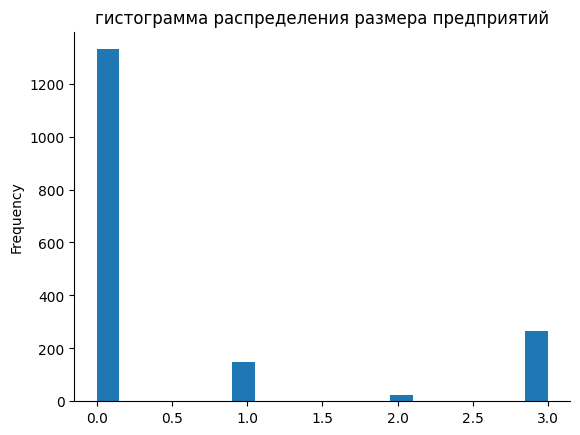

In [ ]:
# @title гистограмма распределения размера предприятий

df['Размер (МСП)'].plot(kind='hist', bins=20, title='гистограмма распределения размера предприятий')
plt.gca().spines[['top', 'right',]].set_visible(False)

Наибольшее количество компаний приходится на микропредприятия (0)

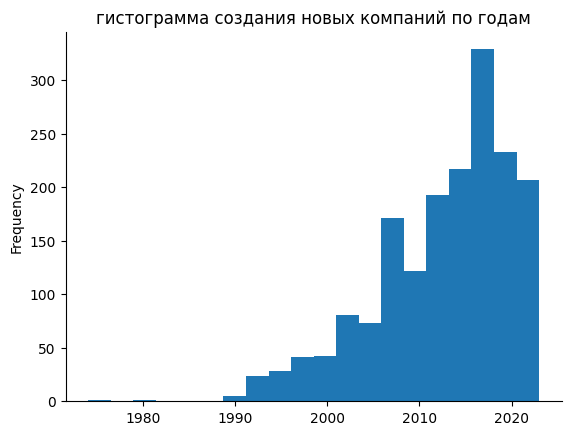

In [ ]:
# @title гистограмма создания новых компаний по годам

df['год создания'].plot(kind='hist', bins=20, title='гистограмма создания новых компаний по годам')
plt.gca().spines[['top', 'right',]].set_visible(False)

Начиная с начала 1990-х и заканчивая серединой 2010-х гг. наблюдается экспоненциальный рост создания новых компаний, что вызвано полной перестройкой экономики страны в 1990-х (развитие рыночной экономики). Незначительный спад во второй половине 2010-х может быть вызван внешнеполитическими событиями (начало ввода первых, в новейшей истории, санкций в отношении нашей страны) и сложностями ведения бизнеса из-за этого

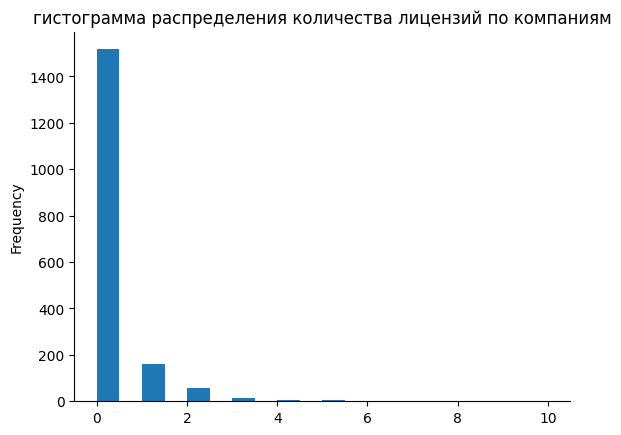

In [ ]:
# @title гистограмма распределения количества лицензий по компаниям

df['Лицензий'].plot(kind='hist', bins=20, title='гистограмма распределения количества лицензий по компаниям')
plt.gca().spines[['top', 'right',]].set_visible(False)

В основном компании работают без лицензий, либо имеют 1-2 лицензии

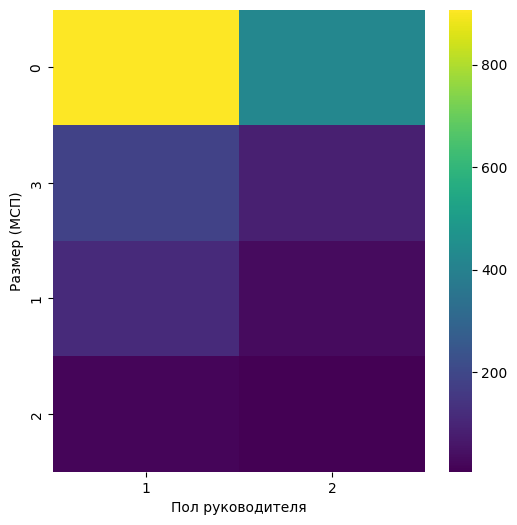

In [ ]:
# @title Размер (МСП) vs Пол руководителя

plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Размер (МСП)'].value_counts()
    for x_label, grp in df.groupby('Пол руководителя')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Пол руководителя')
_ = plt.ylabel('Размер (МСП)')

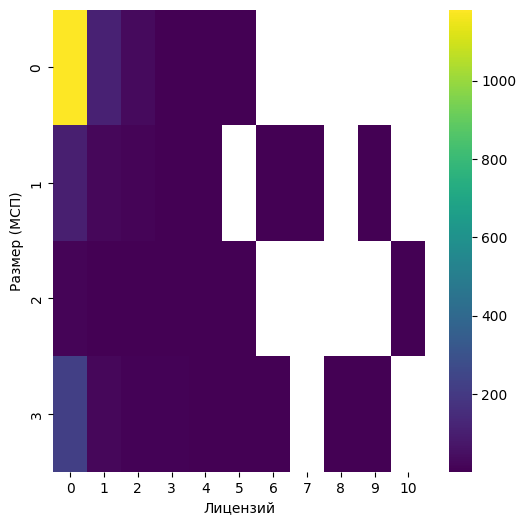

In [ ]:
# @title Размер (МСП) vs Лицензии

plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Размер (МСП)'].value_counts()
    for x_label, grp in df.groupby('Лицензий')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Лицензий')
_ = plt.ylabel('Размер (МСП)')

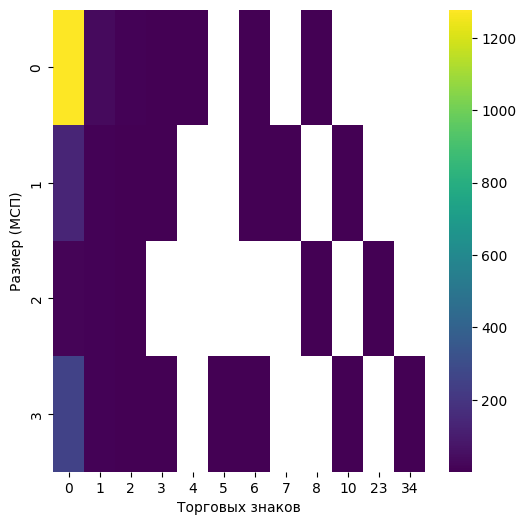

In [ ]:
# @title Размер (МСП) vs Торговые знаки

plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Размер (МСП)'].value_counts()
    for x_label, grp in df.groupby('Торговых знаков')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Торговых знаков')
_ = plt.ylabel('Размер (МСП)')

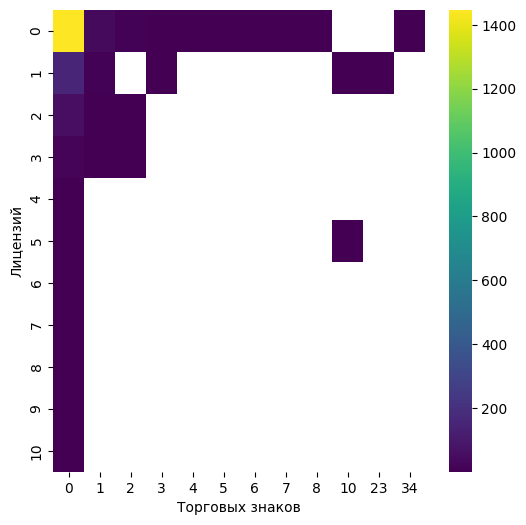

In [ ]:
# @title Лицензии vs Торговые знаки

plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Лицензий'].value_counts()
    for x_label, grp in df.groupby('Торговых знаков')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Торговых знаков')
_ = plt.ylabel('Лицензий')

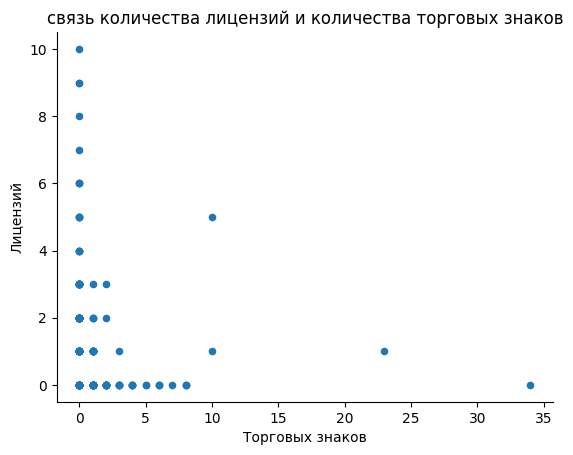

In [ ]:
# @title торговые знаки vs лицензии

df.plot(kind='scatter', x='Торговых знаков', y='Лицензий', s=20, alpha=1, title='связь количества лицензий и количества торговых знаков')
plt.gca().spines[['top', 'right',]].set_visible(False)

Большинтво компаний работает и без лицензий и без торговыз знаков. Но если у компании есть лицензия, то, как правило, у нее нет торговых знаков и наоборот, чем больше у компании торговых знаков, тем меньше у нее лицензий и наоборот

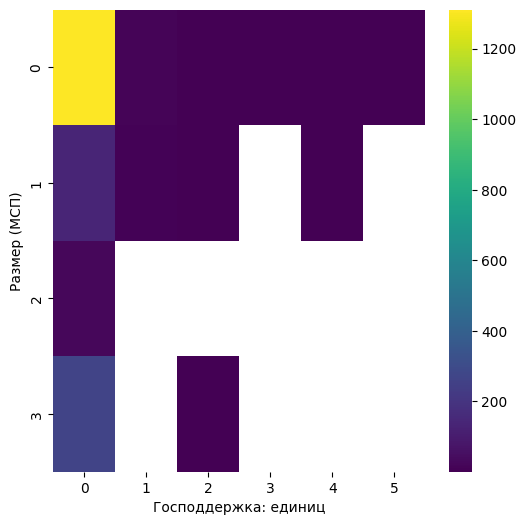

In [ ]:
# @title Размер (МСП) vs Господдержка: единиц

plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Размер (МСП)'].value_counts()
    for x_label, grp in df.groupby('Господдержка: единиц')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Господдержка: единиц')
_ = plt.ylabel('Размер (МСП)')

В основном компании работают без Господдержки

Проверим с помощью визуализаций несколько гипотез

Гипотеза 1. Прибыль зависит от выручки

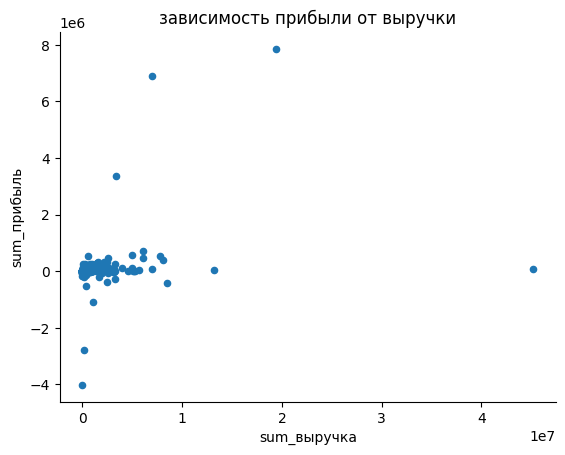

In [ ]:
# @title sum_выручка vs sum_прибыль

df.plot(kind='scatter', x='sum_выручка', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от выручки')
plt.gca().spines[['top', 'right',]].set_visible(False)

В целом отмечается, что с увеличением выручки растет и прибыль. Визуально гипотреза подтвердилась

Гипотеза 2. Выручка и прибыль зависят от размера (МСП)

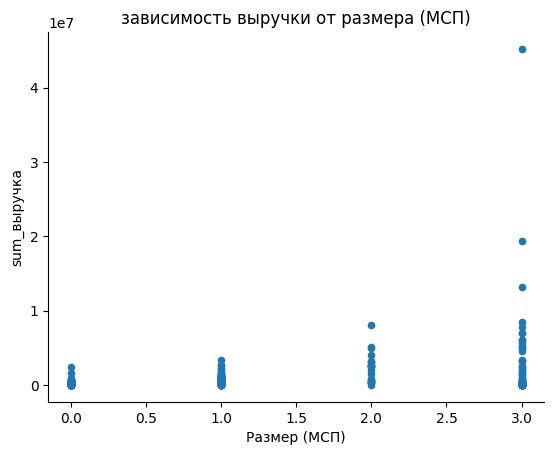

In [ ]:
# @title Размер (МСП) vs sum_выручка

df.plot(kind='scatter', x='Размер (МСП)', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от размера (МСП)')
plt.gca().spines[['top', 'right',]].set_visible(False)

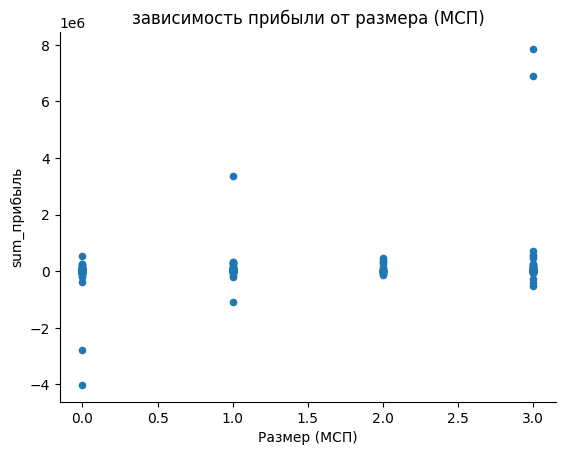

In [ ]:
# @title Размер (МСП) vs sum_прибыль

df.plot(kind='scatter', x='Размер (МСП)', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от размера (МСП)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза подтвердилась. В целом наблюдается линейное изменение выручки и прибыли в зависимости от типа МСП. Наименьшая выручка у микро п/п (0) и в дальнейшем идет закономерный рост с изменением масштаба п/п - малое п/п (1), среднее (2) и Не в МСП (3)

Гипотеза 3. Выручка и прибыль зависят от статуса

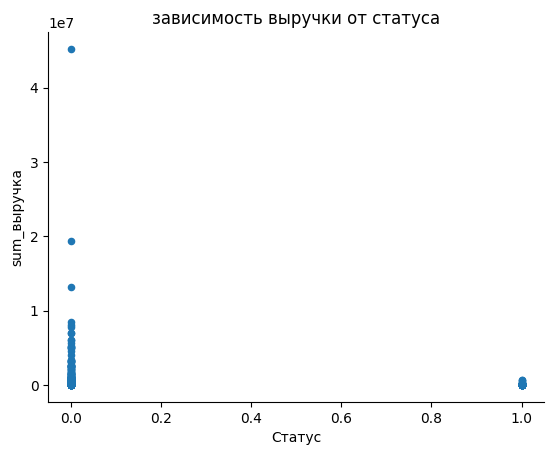

In [ ]:
# @title Статус vs sum_выручка

df.plot(kind='scatter', x='Статус', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от статуса')
plt.gca().spines[['top', 'right',]].set_visible(False)

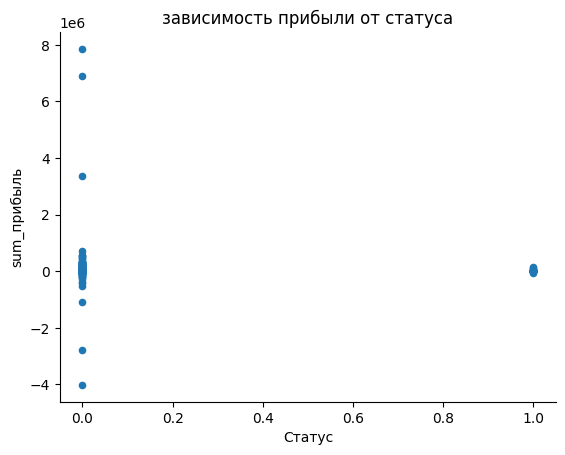

In [ ]:
# @title Статус vs sum_прибыль

df.plot(kind='scatter', x='Статус', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от статуса')
plt.gca().spines[['top', 'right',]].set_visible(False)

В целом выручка и прибыль зависят от статуса. У действующих компаний и п/п (0) выручка и прибыль выше, чем у закрытых (1)

Гипотеза 4. Выручка и прибыль зависят от года создания компании

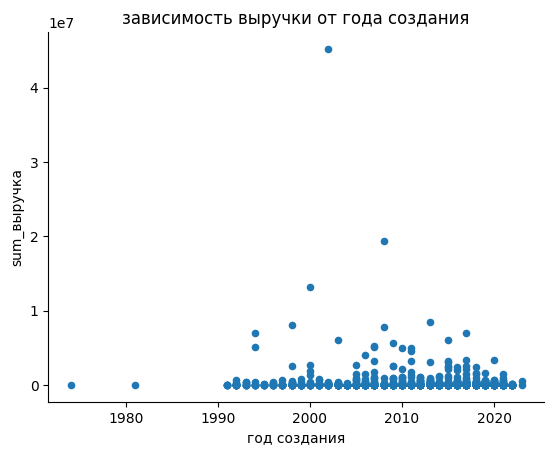

In [ ]:
# @title год создания vs sum_выручка

df.plot(kind='scatter', x='год создания', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от года создания')
plt.gca().spines[['top', 'right',]].set_visible(False)

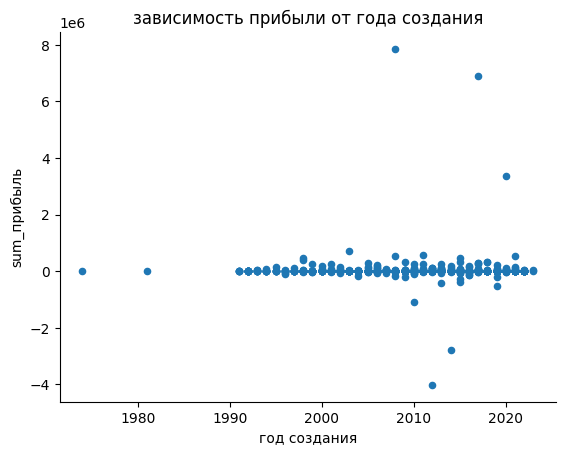

In [ ]:
# @title год создания vs sum_прибыль

df.plot(kind='scatter', x='год создания', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от года создания')
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза не подтвердилась. Визуально нет какой-то взаимосвязи между прибылью и выручкой и годом основания компании

Гипотеза 5. Выручка и прибыль зависят от пола руководителя

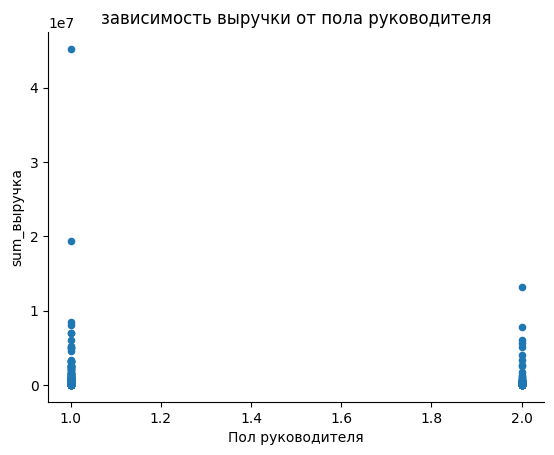

In [ ]:
# @title пол руководителя vs sum_выручка

df.plot(kind='scatter', x='Пол руководителя', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от пола руководителя')
plt.gca().spines[['top', 'right',]].set_visible(False)

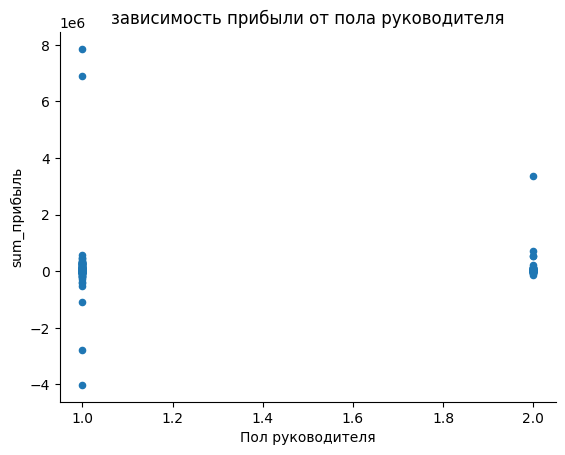

In [ ]:
# @title пол руководителя vs sum_прибыль

df.plot(kind='scatter', x='Пол руководителя', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от пола руководителя')
plt.gca().spines[['top', 'right',]].set_visible(False)

Заметной разницы между полом и выручкой и прибылью на графике не прослеживается (максимальные точки у мужчин могут быть выбросом). Можно также сделать интересный вывод о прибыли - компании под руководством мужчин имеют более отрицательную прибыль, по сравнению с компаниями под руководством женщин

Данную гипотрезу стоит проверить статистическими методами

Гипотеза (Н0): выручка не зависит от пола руководителя

Альтернативная гипотеза (Н1): выручка зависит от пола руководителя

Подготовим два датафрейма - в одном будут данные по компаниям, в которых руководитель мужчина, а во втором - женщина

1 - мужчина, 2 - женщина

In [ ]:
df_male = df[df['Пол руководителя'] == 1]
df_male

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
0,1,1136455002034,Общества с ограниченной ответственностью,Саратовская область,0,0,46.90,1,2013,21469,...,0,0,0,0,0.00,0.0,0.00,0.00,0,2
2,5,1207800031790,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,41.20,1,2020,3090,...,0,0,0,0,0.00,0.0,0.00,0.00,0,1
4,8,1173025002303,Общества с ограниченной ответственностью,Астраханская область,0,0,79.11,1,2017,456,...,0,0,0,7,86896.00,0.0,3.00,7.00,0,1
5,9,1097847226817,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,56.10,1,2009,956,...,0,0,0,2,24260.00,0.0,0.00,0.00,0,1
8,13,1137746178184,Общества с ограниченной ответственностью,Москва,0,0,95.11,1,2013,740,...,0,0,0,0,0.00,0.0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,16079,1097847183378,Общества с ограниченной ответственностью,Санкт-Петербург,1,0,50.20,1,2009,119867,...,0,1,1,0,0.00,0.0,0.00,0.00,0,4
1762,16080,1211500000216,Общества с ограниченной ответственностью,Республика Северная Осетия — Алания,0,0,96.01,1,2021,0,...,0,1,0,1,0.00,0.0,0.00,6.25,0,5
1763,16082,1072452000433,Общества с ограниченной ответственностью,Красноярский край,0,0,62.01,1,2007,19604,...,0,0,1,11,5947.13,0.0,0.00,0.00,0,13
1765,16224,1214700012372,Общества с ограниченной ответственностью,Ленинградская область,3,1,41.20,1,2021,0,...,0,0,0,5,0.00,0.0,1.25,0.00,0,0


In [ ]:
df_female = df[df['Пол руководителя'] == 2]
df_female

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
1,2,1155027011589,Общества с ограниченной ответственностью,Московская область,0,0,24.53,2,2015,6803,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
3,6,1064205114137,Общества с ограниченной ответственностью,Кемеровская область — Кузбасс,0,0,16.21.1,2,2006,7,...,0,0,0,2,0.0,0.0,2.0,0.0,0,0
6,10,1070273001292,Общества с ограниченной ответственностью,Республика Башкортостан,3,0,30.3,2,2007,204,...,0,1,1,0,0.0,0.0,0.0,0.0,0,5
7,12,1063123136119,Общества с ограниченной ответственностью,Белгородская область,0,0,68.2,2,2006,2728,...,0,0,0,0,0.0,0.0,0.0,0.0,0,7
16,88,1193328009192,Ассоциации (союзы),Владимирская область,3,0,94.99,2,2019,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,16034,1051400312974,Потребительские общества,Республика Саха (Якутия),1,0,47.11,2,2005,27958,...,0,1,0,5,0.0,0.0,0.0,17.0,0,0
1755,16042,1022202564889,Муниципальные автономные учреждения,Алтайский край,3,0,58.13,2,1994,2880,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
1760,16078,1207700184207,Непубличные акционерные общества,Москва,1,0,70.10,2,2020,596763,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
1764,16222,5147746386200,Общества с ограниченной ответственностью,Москва,3,1,70.22,2,2014,33399,...,0,0,3,0,0.0,0.0,0.0,0.0,0,2


Поскольку компаний, где мужчина руководитель, в таблице больше, то рандомно сравняем количество компаний из обеих выборок

In [ ]:
df_male = df_male.sample(n=len(df_female), random_state=22)
df_male

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
1522,13896,1152204000332,Общества с ограниченной ответственностью,Алтайский край,0,0,01.11.1,1,2015,63507,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
118,1111,1177847407660,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,33.20,1,2017,19663,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
1164,10531,1135043002907,Общества с ограниченной ответственностью,Московская область,0,0,46.41,1,2013,4418,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
615,5458,1195958003394,Общества с ограниченной ответственностью,Пермский край,0,0,96.09,1,2019,1005,...,0,0,1,4,0.0,0.0,4.0,0.0,0,4
637,5580,1027739192480,Общества с ограниченной ответственностью,Москва,0,0,25.61,1,2000,2033,...,0,0,0,0,0.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,11664,1022601935399,Непубличные акционерные общества,Ставропольский край,2,0,64.20,1,1996,57889,...,0,1,1,4,0.0,0.0,8.5,0.0,0,110
664,5752,1181690001415,Общества с ограниченной ответственностью,Республика Татарстан (Татарстан),0,0,49.41,1,2018,4143,...,0,0,0,2,24260.0,0.0,0.0,0.0,0,1
938,8444,1182651023444,Общества с ограниченной ответственностью,Ставропольский край,0,0,46.21,1,2018,28309,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
1195,10635,1025005327940,Потребительские кооперативы,Московская область,0,0,01.13,1,1993,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0


In [ ]:
ab_test = pd.concat([df_male, df_female], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [ ]:
ab_test

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
0,13896,1152204000332,Общества с ограниченной ответственностью,Алтайский край,0,0,01.11.1,1,2015,63507,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
1,1111,1177847407660,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,33.20,1,2017,19663,...,0,0,0,0,0.0,0.0,0.0,0.0,0,3
2,10531,1135043002907,Общества с ограниченной ответственностью,Московская область,0,0,46.41,1,2013,4418,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
3,5458,1195958003394,Общества с ограниченной ответственностью,Пермский край,0,0,96.09,1,2019,1005,...,0,0,1,4,0.0,0.0,4.0,0.0,0,4
4,5580,1027739192480,Общества с ограниченной ответственностью,Москва,0,0,25.61,1,2000,2033,...,0,0,0,0,0.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,16034,1051400312974,Потребительские общества,Республика Саха (Якутия),1,0,47.11,2,2005,27958,...,0,1,0,5,0.0,0.0,0.0,17.0,0,0
1088,16042,1022202564889,Муниципальные автономные учреждения,Алтайский край,3,0,58.13,2,1994,2880,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
1089,16078,1207700184207,Непубличные акционерные общества,Москва,1,0,70.10,2,2020,596763,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
1090,16222,5147746386200,Общества с ограниченной ответственностью,Москва,3,1,70.22,2,2014,33399,...,0,0,3,0,0.0,0.0,0.0,0.0,0,2


In [ ]:
pd.crosstab(ab_test['Пол руководителя'], ab_test['sum_выручка'])

sum_выручка,1,3,7,8,9,14,18,25,30,31,...,4561396,5137819,5661169,6062074,6962851,6996000,7815249,8064380,13179740,45210122
Пол руководителя,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,0,0,1,1,...,1,0,0,0,1,1,0,1,0,1
2,1,0,1,1,0,1,1,1,1,0,...,0,1,1,1,0,0,1,0,1,0


In [ ]:
conversion_rates = ab_test.groupby('Пол руководителя')['sum_выручка']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['выручка', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

<ipython-input-98-f1eebb15b3ab>:6: FutureWarning: The provided callable <function mean at 0x79e61f56fd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])


,выручка,сред. кв. отклонение,ошибка среднего
Пол руководителя,,,
1,274384.663,2045949.934,87558.574
2,160563.425,826768.101,35382.408


<ipython-input-100-31b478262005>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=ab_test['Пол руководителя'], y=ab_test['sum_выручка'], ci=False)


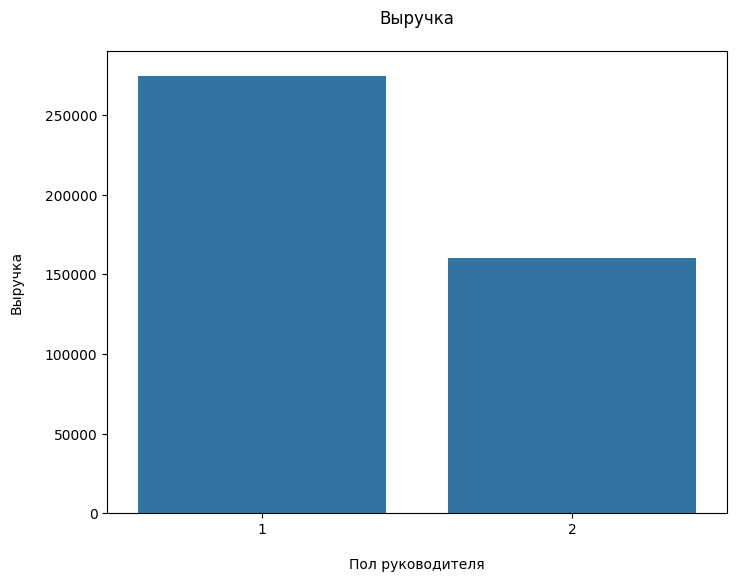

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['Пол руководителя'], y=ab_test['sum_выручка'], ci=False)

plt.ylim(0, 290000)
plt.title('Выручка', pad=20)
plt.xlabel('Пол руководителя', labelpad=15)
plt.ylabel('Выручка', labelpad=15);

Для начала нужно проверить распределения данных на нормальность. Используем для этого тест Шапиро-Уилк и критерий Пирсона для проверки распределения данных

тест Шапиро-Уилк

In [ ]:
def check_normality(data):
  stat, p = st.shapiro(data) # тест Шапиро-Уилк

  alpha = 0.05

  if p < alpha: # условие статистической значимости
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else:
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

  return

check_normality

<function __main__.check_normality(data)>

Критерий Пирсона

In [ ]:
def check_normality_(data):
  stat, p = st.normaltest(data) # Критерий Пирсона

  alpha = 0.05

  if p < alpha: # условие статистической значимости
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else:
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

  return

check_normality_

<function __main__.check_normality_(data)>

In [ ]:
# тест Шапиро-Уилк
check_normality(df_male['sum_выручка'])

check_normality(df_female['sum_выручка'])

Statistics=0.09016, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=0.16740, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
# Критерий Пирсона
check_normality_(df_male['sum_выручка'])

check_normality_(df_female['sum_выручка'])

Statistics=1268.01708, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=938.02140, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


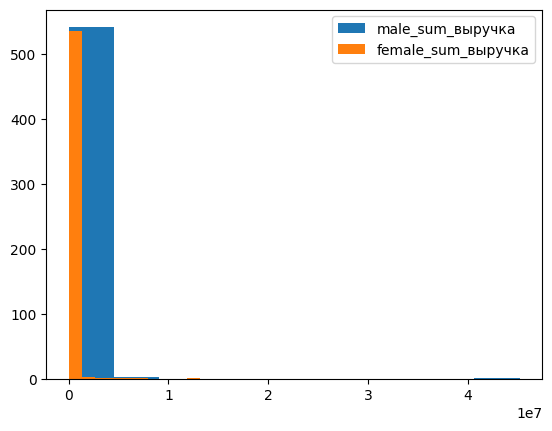

In [ ]:
# стоим гистограмму, чтобы увидеть распределение визуально

plt.hist(df_male['sum_выручка'], bins=10, label = 'male_sum_выручка');
plt.hist(df_female['sum_выручка'], bins=10, label = 'female_sum_выручка');
plt.legend()

Поверка на нормальность показала, что данные распределены не нормально, что также подтверждено визуально (гистограммой).

Поскольку данные распределены не нормально, то для проверки гипотезы можно использовать тест Манна-Уитни

In [ ]:
 # Тест Манна-Уитни

stat, p = st.mannwhitneyu (df_male['sum_выручка'], df_female['sum_выручка'], alternative='two-sided')

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выручка не зависит от пола руководителя')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 166494.00000, p = 0.00082
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы:

Исходя из имеющихся данных и полученных на их основании результатов статистического теста, у нас есть основания полагать, что выручка зависит от пола руководителя

Проведем альтернативную проверку. Преобразуем данные и после этого можно применять праметрические тесты (Т-тест Стьюдента)

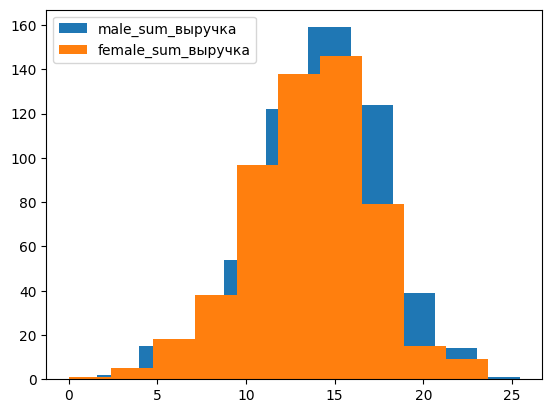

In [ ]:
norm = sorted(np.log2(df_male['sum_выручка']))
norm_ = sorted(np.log2(df_female['sum_выручка']))

plt.hist(norm, bins=10, label = 'male_sum_выручка');
plt.hist(norm_, bins=10, label = 'female_sum_выручка');
plt.legend()

In [ ]:
# Т-тест Стьюдента

stat, p = st.ttest_ind(norm, norm_)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выручка не зависит от пола руководителя')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 3.37632, p = 0.00076
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Альтернативная проверка также показала, что выручка зависит от пола руководителя

Гипотеза 6. Выручка и прибыль зависят от количества лицензий

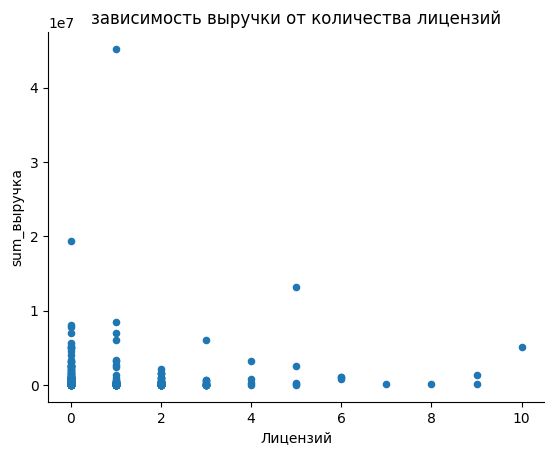

In [ ]:
# @title лицензии vs sum_выручка

df.plot(kind='scatter', x='Лицензий', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от количества лицензий')
plt.gca().spines[['top', 'right',]].set_visible(False)

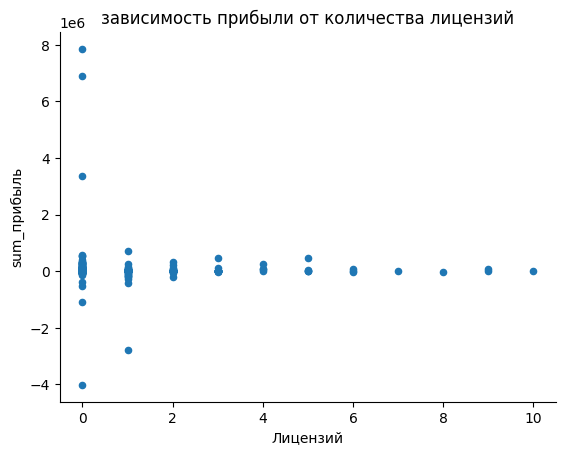

In [ ]:
# @title лицензии vs sum_прибыль

df.plot(kind='scatter', x='Лицензий', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от количества лицензий')
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотреза подтвердилась (обратная корреляция) - чем больше у компаний лицензий, тем меньше у нее выручка и прибыль

Гипотеза 7. Выручка и прибыль зависят от господдержки

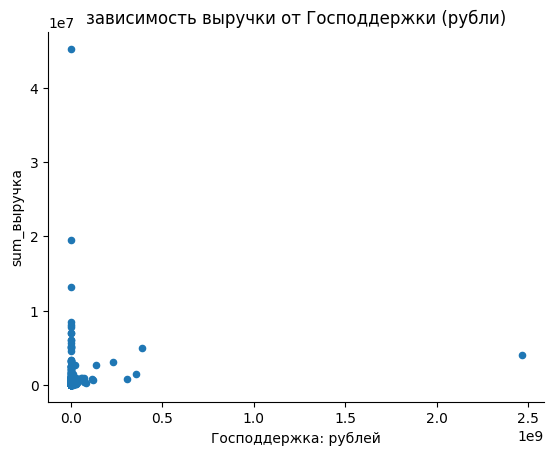

In [ ]:
# @title Господдержка (рубли) vs sum_выручка

df.plot(kind='scatter', x="Господдержка: рублей", y='sum_выручка', s=20, alpha=1, title='зависимость выручки от Господдержки (рубли)')
plt.gca().spines[['top', 'right',]].set_visible(False)

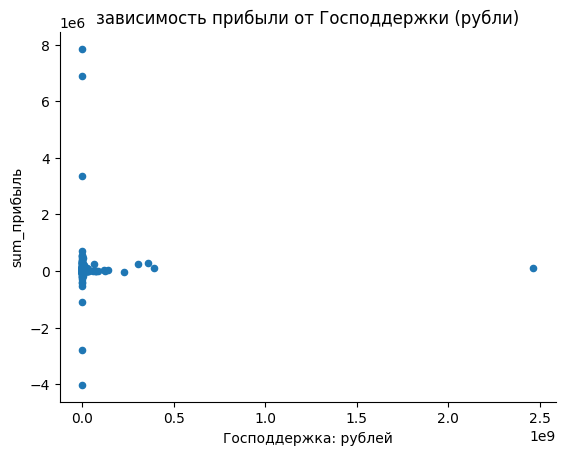

In [ ]:
# @title Господдержка (рубли) vs sum_прибыль

df.plot(kind='scatter', x="Господдержка: рублей", y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от Господдержки (рубли)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза не подтвердилась - визуально Не наблюдается какой-либо связи между господдержкой и выручкой и прибыльностью компаний

Гипотеза 8. Выручка и прибыль зависят от количества торговых знаков

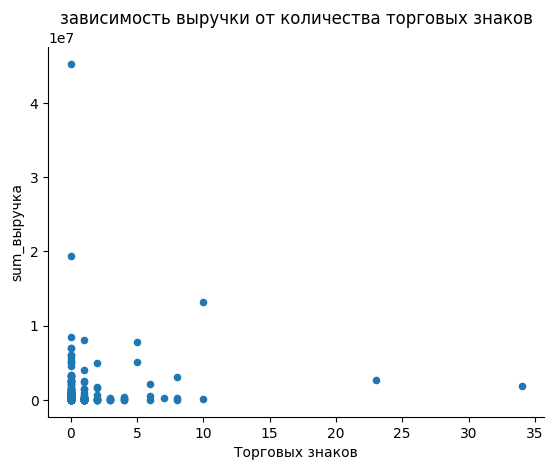

In [ ]:
# @title торговые знаки vs sum_выручка

df.plot(kind='scatter', x='Торговых знаков', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от количества торговых знаков')
plt.gca().spines[['top', 'right',]].set_visible(False)

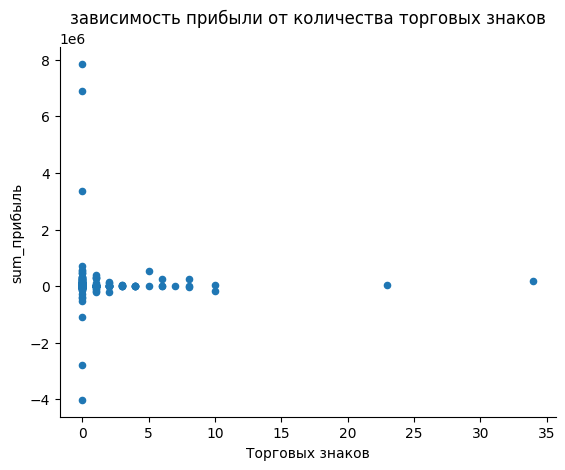

In [ ]:
# @title торговые знаки vs sum_прибыль

df.plot(kind='scatter', x='Торговых знаков', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от количества торговых знаков')
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза подтвердилась (обратная корреляция) - в целом, чем больше у компании торговых знаков, тем меньше у нее выручка и прибыль, как в случае с лицензиями

Гипотеза 9. Выручка и прибыль зависят от численности сотрудников

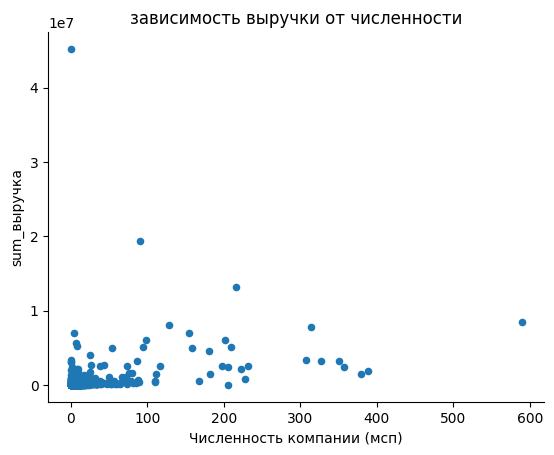

In [ ]:
# @title Численность vs sum_выручка

df.plot(kind='scatter', x='Численность компании (мсп)', y='sum_выручка', s=20, alpha=1, title='зависимость выручки от численности')
plt.gca().spines[['top', 'right',]].set_visible(False)

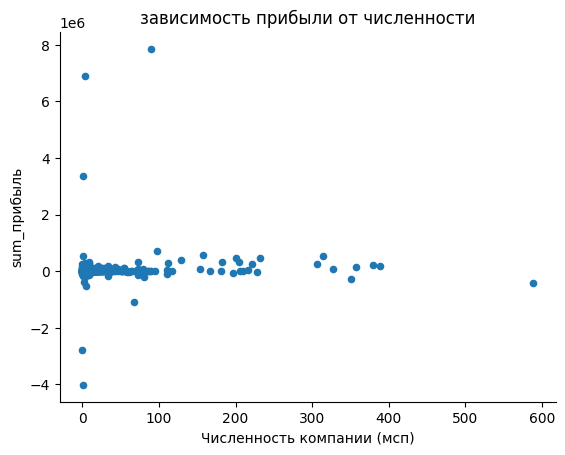

In [ ]:
# @title Численность vs sum_прибыль

df.plot(kind='scatter', x='Численность компании (мсп)', y='sum_прибыль', s=20, alpha=1, title='зависимость прибыли от численности')
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза подтвердилась - в целом, чем больше штат компании, тем больше выручка и приыль

Основные выводы по гипотезам

С помощью построений и статистический расчетов были проверены следующие гипотезы:
- прибыль зависит от выручки (гипотеза подтвердилась)
- выручка и прибыль зависят от типа МСП (гипотеза подтвердилась)
- выручка и прибыль зависят от статуса (гипотеза подтвердилась)
- выручка и прибыль зависят от года основания компании (гипотеза не подтвердилась)
- выручка и прибыль зависят от пола руководителя (гипотеза подтвердилась)
- прибыль и выручка зависит от лицензий (гипотеза подтвердилась - обратная зависимость - чем больше у компаний лицензий, тем меньше у нее выручка и прибыль)
- выручка и прибыль зависят от господдержки (гипотеза не подтвердилась)
- выручка и прибыль зависят от торговых знаков (гипотеза подтвердилась - обратная зависимость - чем больше у компаний торговых знаков, тем меньше у нее выручка и прибыль)
- выручка и прибыль зависят от численности (гипотеза подтвердилась)


Изучим взаимосвязи

Построим pairplot, чтобы выдвинуть гипотезы о взаимосвязи признаков

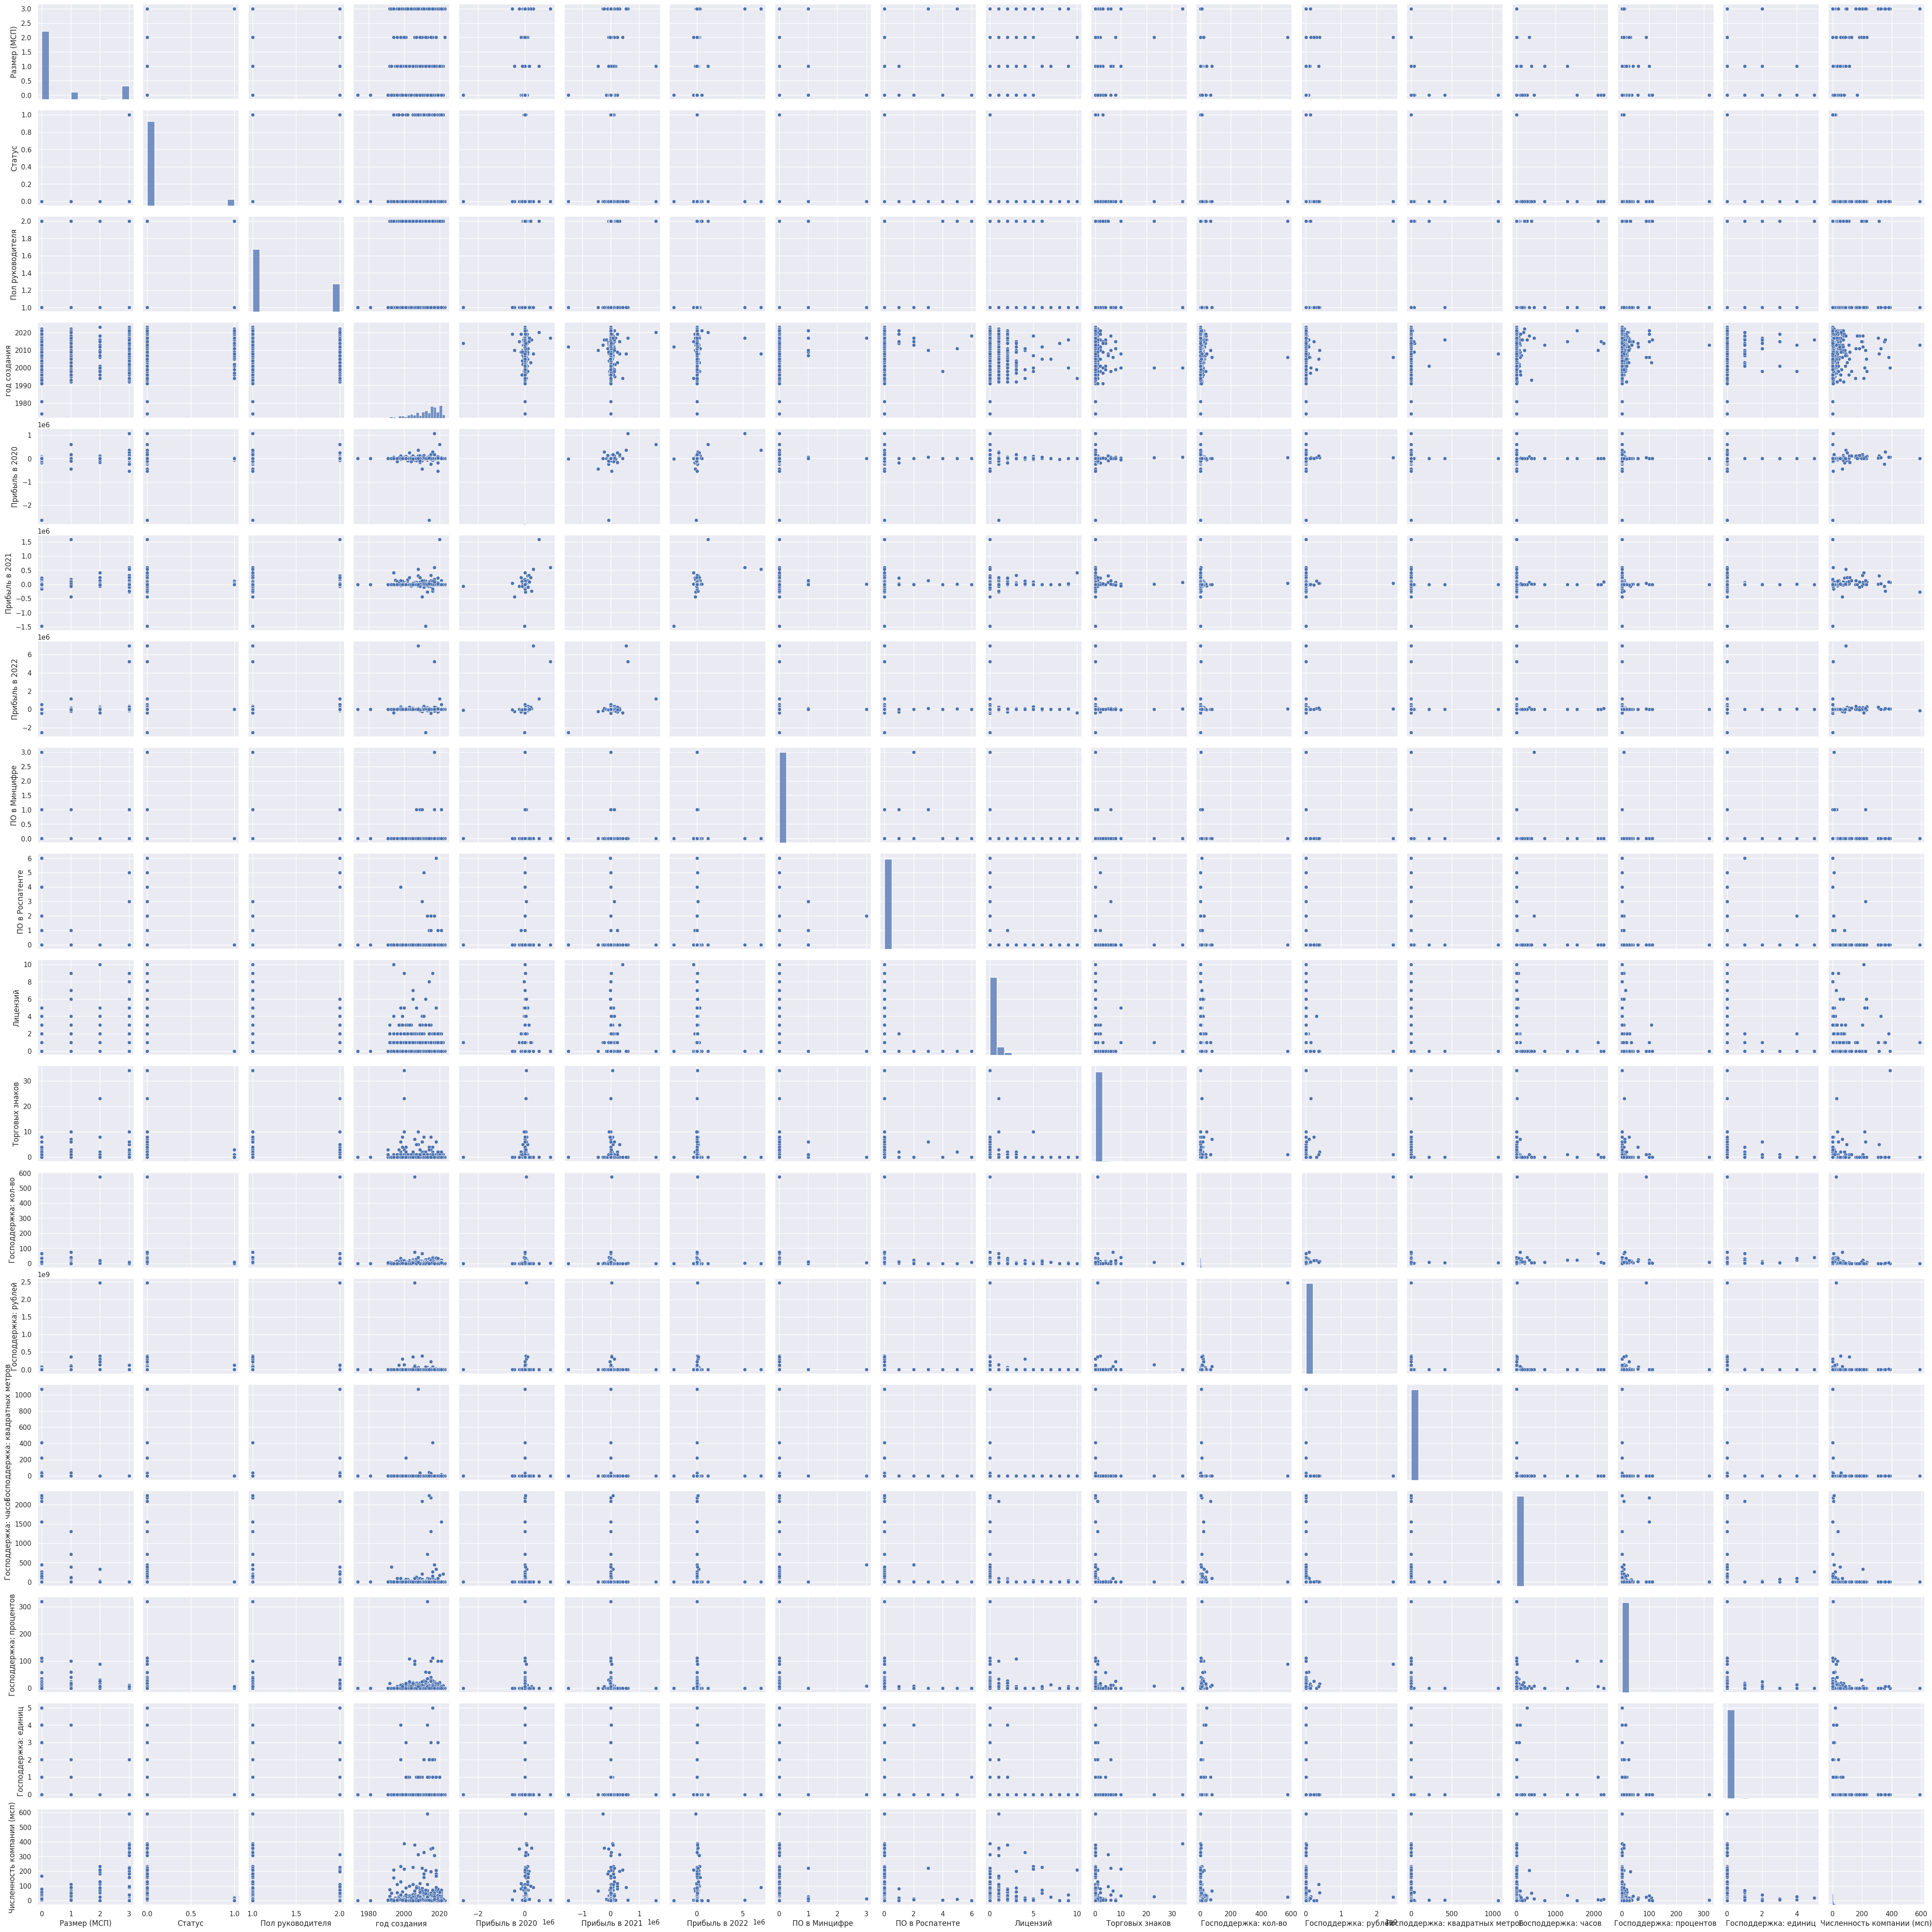

In [ ]:
sns.pairplot(df[['Размер (МСП)', 'Статус', 'Пол руководителя', 'год создания', 'Прибыль в 2020', 'Прибыль в 2021', 'Прибыль в 2022', 'ПО в Минцифре', 'ПО в Роспатенте', 'Лицензий', 'Торговых знаков', 'Господдержка: кол-во', 'Господдержка: рублей', 'Господдержка: квадратных метров', 'Господдержка: часов', 'Господдержка: процентов', 'Господдержка: единиц', 'Численность компании (мсп)']])

Составим корреляционную матрицу всех числовых признаков набора данных и визуализируем её с помощью тепловой карты

In [ ]:
# form correlation matrix
matrix = pd.DataFrame(df[['Размер (МСП)', 'Статус', 'Пол руководителя', 'год создания', 'Выручка в 2020', 'Выручка в 2021', 'Выручка в 2022', 'sum_выручка', 'Прибыль в 2020', 'Прибыль в 2021', 'Прибыль в 2022', 'sum_прибыль', 'ПО в Минцифре', 'ПО в Роспатенте', 'Лицензий', 'Торговых знаков', "Господдержка: кол-во", "Господдержка: рублей", "Господдержка: квадратных метров", "Господдержка: часов", "Господдержка: процентов", "Господдержка: единиц", 'Численность компании (мсп)']])
matrix.corr()

,Размер (МСП),Статус,Пол руководителя,год создания,Выручка в 2020,Выручка в 2021,Выручка в 2022,sum_выручка,Прибыль в 2020,Прибыль в 2021,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
Размер (МСП),1.000000,0.611297,-0.011594,-0.035633,0.209549,0.207932,0.153006,0.195412,0.045135,0.076676,...,0.022268,0.138963,0.084224,0.020543,0.047859,-0.018552,-0.021260,-0.024625,-0.003793,0.221812
Статус,0.611297,1.000000,0.011223,0.096599,-0.028485,-0.034671,-0.030421,-0.033027,-0.003597,-0.006608,...,-0.017990,-0.082762,-0.025333,-0.023936,-0.008487,-0.010119,-0.021729,-0.036874,-0.031564,-0.062136
Пол руководителя,-0.011594,0.011223,1.000000,0.038804,-0.020009,-0.025189,-0.028689,-0.026909,0.020835,0.021451,...,0.032451,0.000091,-0.008398,0.043219,0.026431,0.035735,-0.008415,0.000695,0.013755,-0.034016
год создания,-0.035633,0.096599,0.038804,1.000000,-0.086562,-0.088995,-0.053614,-0.077116,-0.004641,-0.014469,...,-0.003295,-0.167684,-0.099895,-0.043040,-0.037634,-0.016827,0.008719,-0.028687,-0.026159,-0.080513
Выручка в 2020,0.209549,-0.028485,-0.020009,-0.086562,1.000000,0.863087,0.726951,0.892391,0.135185,0.262586,...,0.008658,0.127962,0.147869,0.085836,0.112632,-0.005231,0.001655,0.026677,-0.005600,0.383580
Выручка в 2021,0.207932,-0.034671,-0.025189,-0.088995,0.863087,1.000000,0.894464,0.972701,0.092176,0.271294,...,0.015964,0.151814,0.153312,0.086589,0.111405,-0.005895,0.001936,0.026605,-0.001267,0.372838
Выручка в 2022,0.153006,-0.030421,-0.028689,-0.053614,0.726951,0.894464,1.000000,0.951458,0.096169,0.196046,...,0.026323,0.092797,0.080235,0.036471,0.048786,-0.004428,0.003120,0.010734,-0.001648,0.258204
sum_выручка,0.195412,-0.033027,-0.026909,-0.077116,0.892391,0.972701,0.951458,1.000000,0.112319,0.250119,...,0.019733,0.126454,0.126751,0.068081,0.089113,-0.005376,0.002535,0.020783,-0.002786,0.345036
Прибыль в 2020,0.045135,-0.003597,0.020835,-0.004641,0.135185,0.092176,0.096169,0.112319,1.000000,0.288677,...,-0.000652,-0.016902,0.020544,0.019150,0.024538,-0.000265,0.004524,0.009158,-0.000635,0.069819
Прибыль в 2021,0.076676,-0.006608,0.021451,-0.014469,0.262586,0.271294,0.196046,0.250119,0.288677,1.000000,...,0.023063,0.075380,0.042764,0.013725,0.022529,-0.002253,0.016813,-0.001621,0.001996,0.072892


<Axes: >

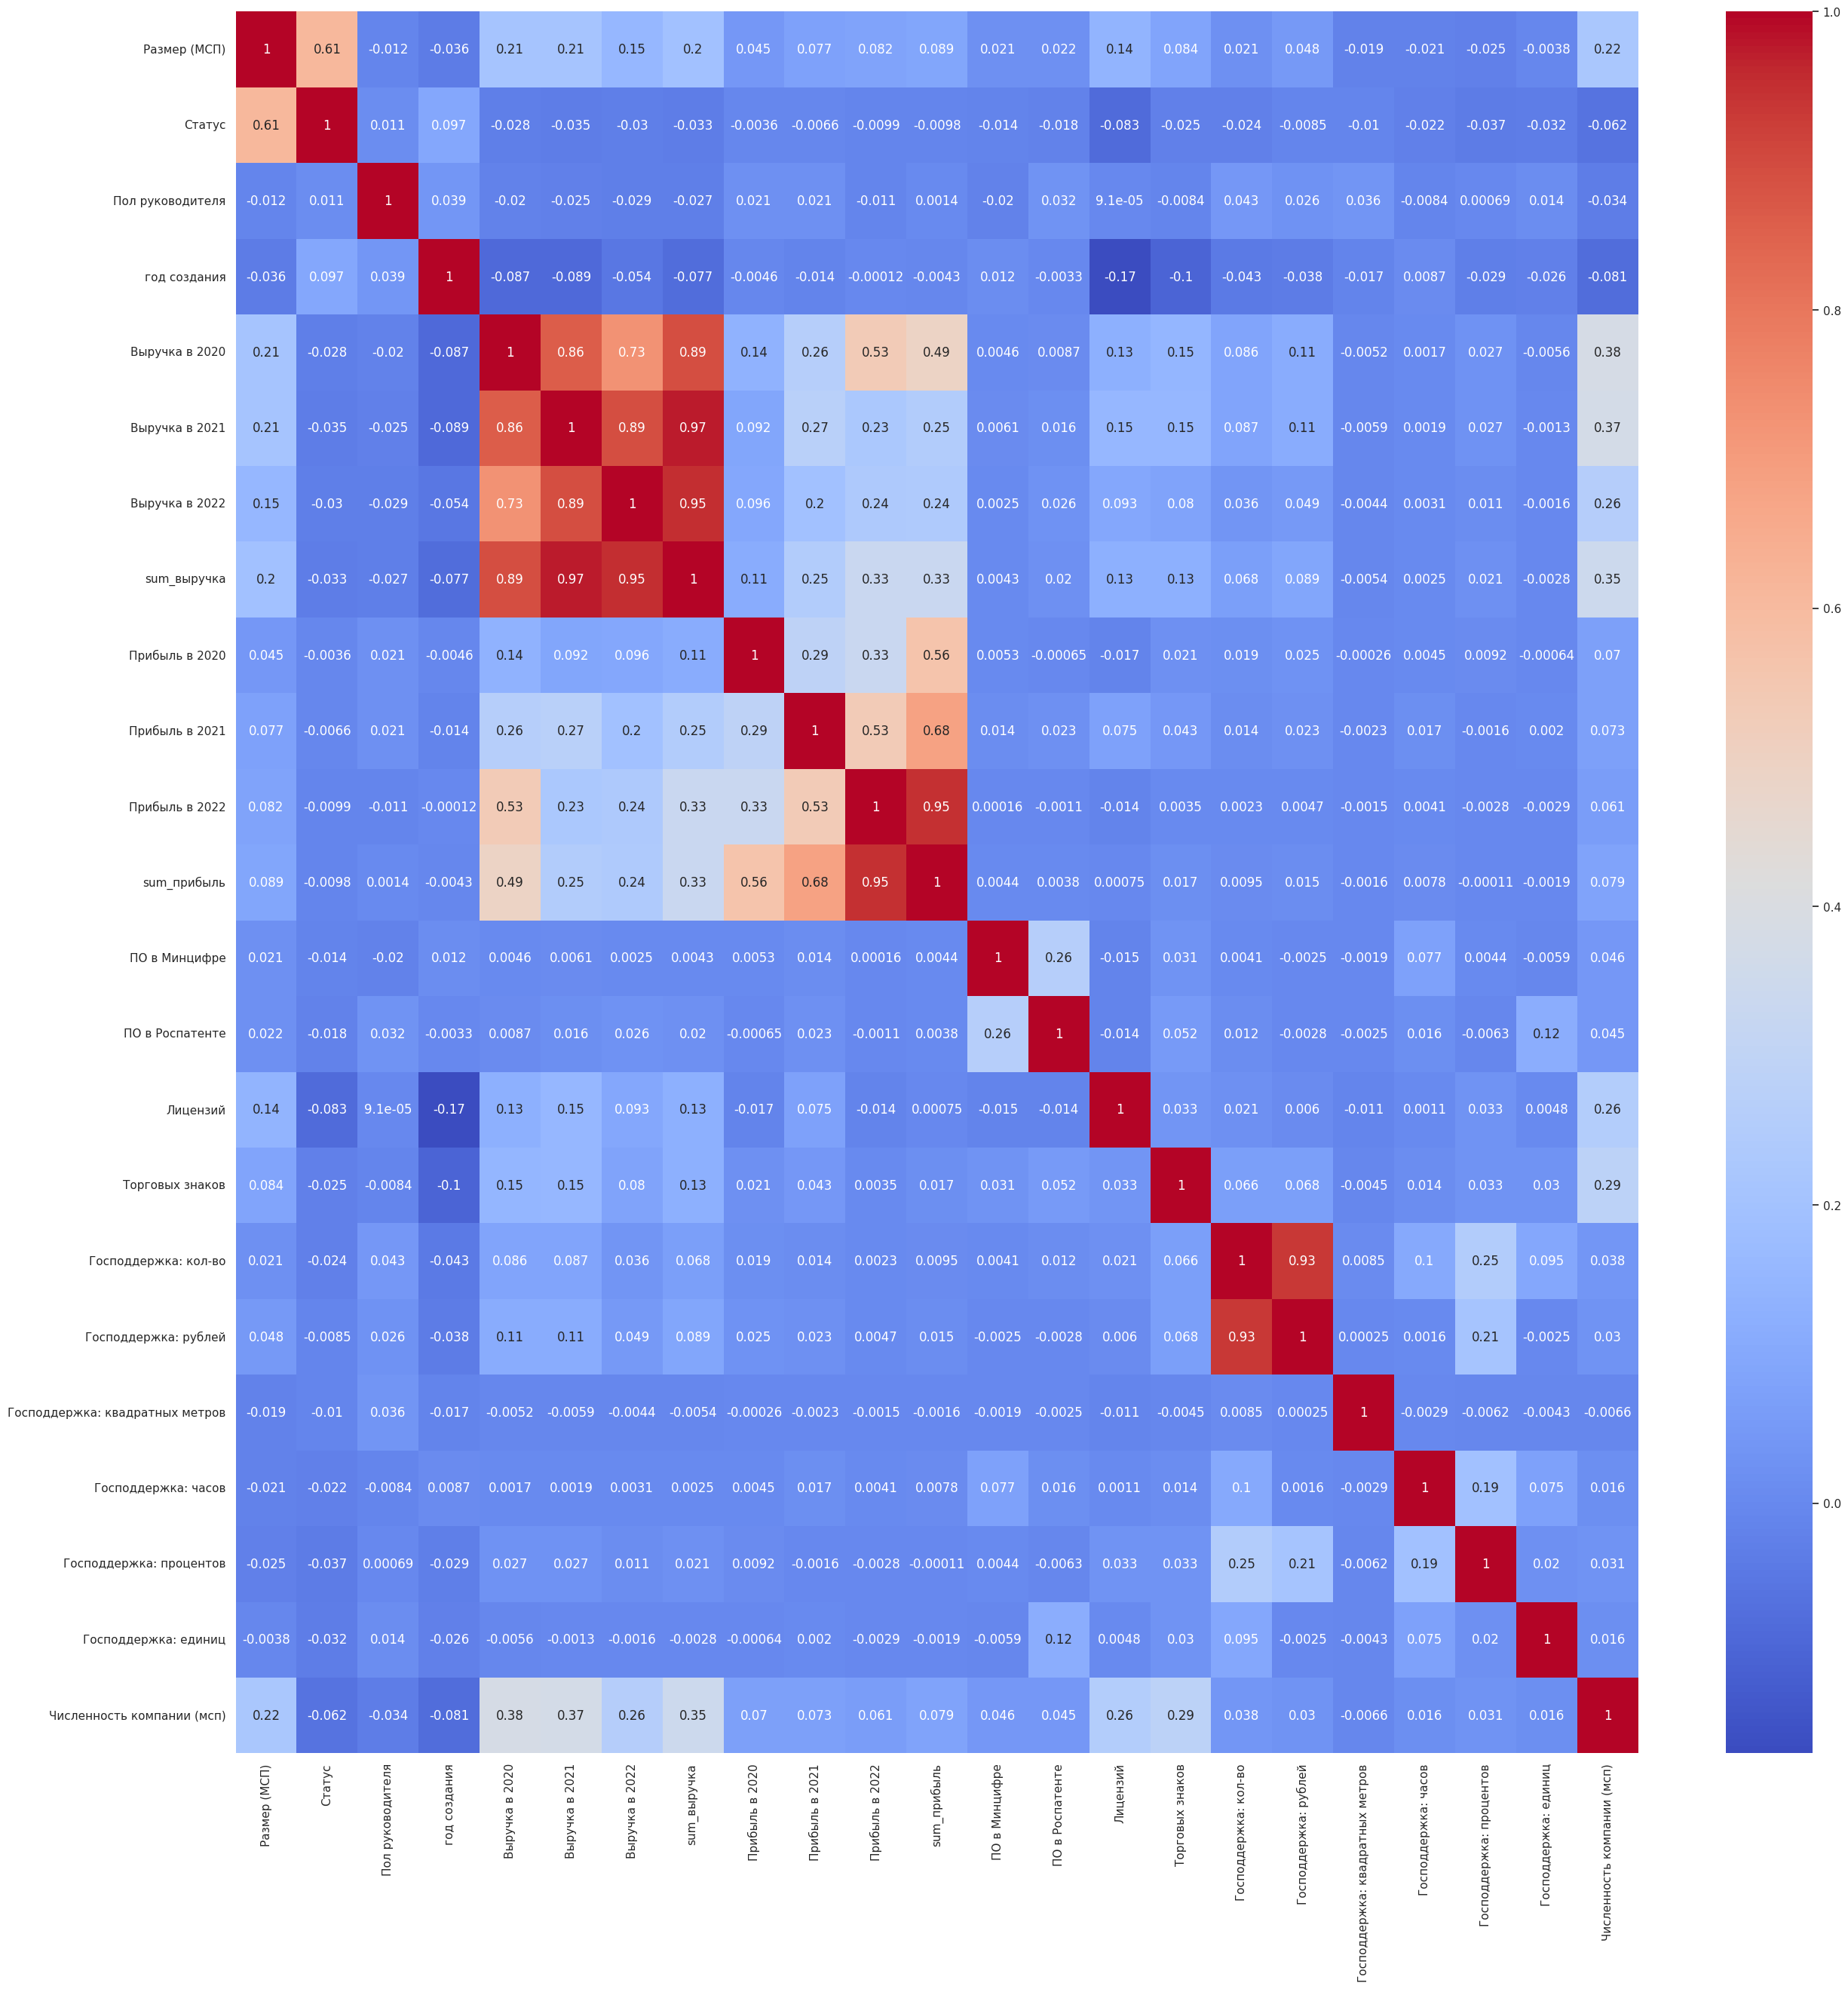

In [ ]:
# визуализируем при помощи тепловой карты
sns.set(rc={'figure.figsize':(30.0,30.0)})
sns.heatmap(matrix.corr(), annot=True, cmap='coolwarm')

Наблюдается довольно сильная корреляция между:
1. выручкой по годам
2. прибылью по годам

Дополнительно проверим с помощью статистических расчетов еще одну гипотезу (выполним А/В-тест)

Сравним Москву и Санкт-Петербург. Имеется ли статистическая разница в выручке компаний из Москвы и Спанк-Петербурга

Гипотеза (Н0): Компании Москвы и Санк-Петербурга не отличаются по выручке

Гипотеза (Н1): Компании Москвы и Санк-Петербурга отличаются по выручке


Подготовим два датафрейма - в одном будут данные по компаниям из Москвы, а во втором из Санкт-Петербурга

In [ ]:
df_Moscow = df[df['Регион'] == 'Москва']
df_Moscow

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
8,13,1137746178184,Общества с ограниченной ответственностью,Москва,0,0,95.11,1,2013,740,...,0,0,0,0,0.00,0.0,0.0,0.0,0,0
17,92,1027700544783,Общества с ограниченной ответственностью,Москва,0,0,62.01,1,1999,11350,...,0,0,0,0,0.00,0.0,0.0,0.0,0,1
28,137,1227700155759,Общества с ограниченной ответственностью,Москва,0,0,78.10,2,2022,0,...,0,0,0,1,346.77,0.0,0.0,0.0,0,1
53,283,5147746446425,Общества с ограниченной ответственностью,Москва,0,0,59.11,2,2014,0,...,0,0,0,0,0.00,0.0,0.0,0.0,0,1
56,288,1217700334114,Общества с ограниченной ответственностью,Москва,0,0,86.90,2,2021,0,...,0,1,0,6,3770.21,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,15989,5167746454706,Общества с ограниченной ответственностью,Москва,3,0,46.45.1,1,2016,9601,...,0,0,1,3,0.00,0.0,0.0,7.0,2,0
1752,16035,1177746087420,Общества с ограниченной ответственностью,Москва,1,0,38.32.5,1,2017,684712,...,0,0,0,0,0.00,0.0,0.0,0.0,0,9
1753,16040,1127746018663,Общества с ограниченной ответственностью,Москва,1,0,46.51,1,2012,22198,...,0,0,0,0,0.00,0.0,0.0,0.0,0,4
1760,16078,1207700184207,Непубличные акционерные общества,Москва,1,0,70.10,2,2020,596763,...,0,0,0,0,0.00,0.0,0.0,0.0,0,1


In [ ]:
df_Saint_Petersburg = df[df['Регион'] == 'Санкт-Петербург']
df_Saint_Petersburg

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
2,5,1207800031790,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,41.20,1,2020,3090,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
5,9,1097847226817,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,56.10,1,2009,956,...,0,0,0,2,24260.0,0.0,0.0,0.0,0,1
15,87,1097847330690,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,46.73,1,2009,5625,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
34,145,1147847269767,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,46.49.49,1,2014,13951,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
40,260,1197847165482,Общества с ограниченной ответственностью,Санкт-Петербург,1,0,81.22,2,2019,58224,...,0,0,0,0,0.0,0.0,0.0,0.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,15811,1037825022608,Непубличные акционерные общества,Санкт-Петербург,0,0,45.20.1,1,1993,1703,...,0,0,0,0,0.0,0.0,0.0,0.0,0,5
1741,15953,1147847166884,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,46.90,1,2014,1606,...,0,0,0,3,0.0,0.0,1.0,7.0,0,2
1759,16067,1197847163590,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,47.11,1,2019,91361,...,0,2,0,0,0.0,0.0,0.0,0.0,0,8
1761,16079,1097847183378,Общества с ограниченной ответственностью,Санкт-Петербург,1,0,50.20,1,2009,119867,...,0,1,1,0,0.0,0.0,0.0,0.0,0,4


Поскольку компаний из Москвы в таблице больше, то рандомно сравняем количество компаний из обоих городов

In [ ]:
df_Moscow = df_Moscow.sample(n=len(df_Saint_Petersburg), random_state=22)
df_Moscow

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
681,5903,1094345010627,Общества с ограниченной ответственностью,Москва,0,0,41.2,1,2009,0,...,0,0,0,0,0.00,0.0,0.0,0.0,0,1
700,5987,1037728016380,Общества с ограниченной ответственностью,Москва,0,0,86.23,1,2003,8838,...,0,1,0,1,153504.00,0.0,0.0,0.0,0,7
1579,14252,5177746236454,Общества с ограниченной ответственностью,Москва,3,1,45.31,2,2017,700,...,0,0,0,0,0.00,0.0,0.0,0.0,0,0
1127,10297,1027739825740,Общества с ограниченной ответственностью,Москва,0,0,95.23,2,1992,1150,...,0,0,0,0,0.00,0.0,0.0,0.0,0,1
1542,14062,1227700115367,Общества с ограниченной ответственностью,Москва,0,0,71.12.2,1,2022,0,...,0,0,0,0,0.00,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,10846,1117746179110,Общества с ограниченной ответственностью,Москва,3,0,42.11,1,2011,1197590,...,0,0,0,0,0.00,0.0,0.0,0.0,0,158
650,5713,5177746174667,Общества с ограниченной ответственностью,Москва,0,0,93.13,2,2017,12814,...,0,1,0,22,1250592.27,0.0,3.7,0.0,0,4
215,1631,1197746567875,Общества с ограниченной ответственностью,Москва,3,0,42.99,1,2019,9320,...,0,0,0,0,0.00,0.0,0.0,0.0,0,2
1488,13717,1147746976222,Общества с ограниченной ответственностью,Москва,0,0,45.31.1,1,2014,60361,...,0,0,0,2,4000000.00,0.0,0.0,0.0,0,0


In [ ]:
ab_test_ = pd.concat([df_Moscow, df_Saint_Petersburg], axis=0)
ab_test_.reset_index(drop=True, inplace=True)

In [ ]:
ab_test_

,index,ОГРН,ОПФ,Регион,Размер (МСП),Статус,Вид деятельности (код овэд),Пол руководителя,год создания,Выручка в 2020,...,ПО в Роспатенте,Лицензий,Торговых знаков,Господдержка: кол-во,Господдержка: рублей,Господдержка: квадратных метров,Господдержка: часов,Господдержка: процентов,Господдержка: единиц,Численность компании (мсп)
0,5903,1094345010627,Общества с ограниченной ответственностью,Москва,0,0,41.2,1,2009,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
1,5987,1037728016380,Общества с ограниченной ответственностью,Москва,0,0,86.23,1,2003,8838,...,0,1,0,1,153504.0,0.0,0.0,0.0,0,7
2,14252,5177746236454,Общества с ограниченной ответственностью,Москва,3,1,45.31,2,2017,700,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
3,10297,1027739825740,Общества с ограниченной ответственностью,Москва,0,0,95.23,2,1992,1150,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
4,14062,1227700115367,Общества с ограниченной ответственностью,Москва,0,0,71.12.2,1,2022,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,15811,1037825022608,Непубличные акционерные общества,Санкт-Петербург,0,0,45.20.1,1,1993,1703,...,0,0,0,0,0.0,0.0,0.0,0.0,0,5
286,15953,1147847166884,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,46.90,1,2014,1606,...,0,0,0,3,0.0,0.0,1.0,7.0,0,2
287,16067,1197847163590,Общества с ограниченной ответственностью,Санкт-Петербург,0,0,47.11,1,2019,91361,...,0,2,0,0,0.0,0.0,0.0,0.0,0,8
288,16079,1097847183378,Общества с ограниченной ответственностью,Санкт-Петербург,1,0,50.20,1,2009,119867,...,0,1,1,0,0.0,0.0,0.0,0.0,0,4


In [ ]:
pd.crosstab(ab_test_['Регион'], ab_test_['sum_выручка'])

sum_выручка,3,60,80,92,122,125,139,150,219,229,...,1525472,2168676,2510196,2530134,2670751,3338081,3967511,4922165,4984588,5661169
Регион,,,,,,,,,,,,,,,,,,,,,
Москва,1,0,1,0,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,1
Санкт-Петербург,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,1,0,1,1,0,0


In [ ]:
conversion_rates = ab_test_.groupby('Регион')['sum_выручка']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['выручка', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

<ipython-input-125-e18a3458b0e1>:6: FutureWarning: The provided callable <function mean at 0x79e61f56fd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])


,выручка,сред. кв. отклонение,ошибка среднего
Регион,,,
Москва,223310.503,736038.711,61124.688
Санкт-Петербург,209983.634,624593.211,51869.643


<ipython-input-126-49c318ecf7cb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=ab_test_['Регион'], y=ab_test_['sum_выручка'], ci=False)


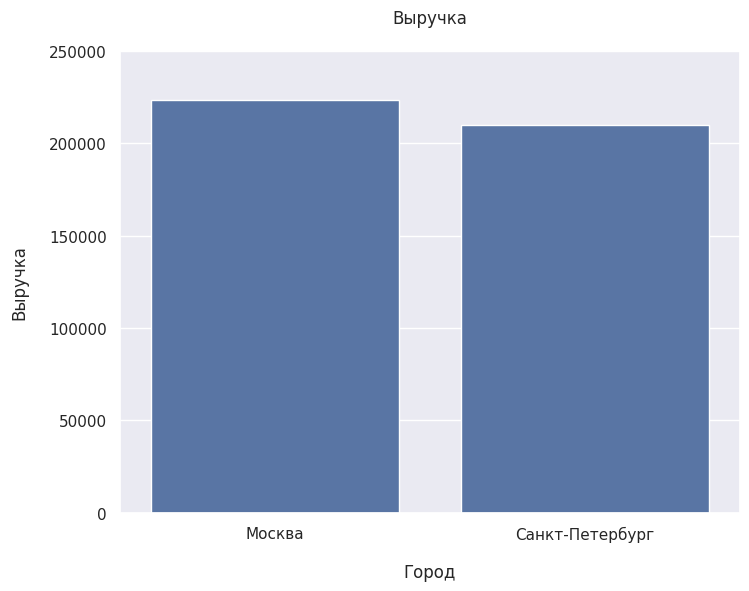

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test_['Регион'], y=ab_test_['sum_выручка'], ci=False)

plt.ylim(0, 250000)
plt.title('Выручка', pad=20)
plt.xlabel('Город', labelpad=15)
plt.ylabel('Выручка', labelpad=15);

Судя по приведенной выше статистике и графику, видно, что выручка компаний в Москве больше, чем в Питере. Проверим это статистически

Проверим данные на нормальность распределения

In [ ]:
# тест Шапиро-Уилк
check_normality(df_Moscow['sum_выручка'])

check_normality(df_Saint_Petersburg['sum_выручка'])

Statistics=0.30442, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=0.34428, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
# Критерий Пирсона
check_normality_(df_Moscow['sum_выручка'])

check_normality_(df_Saint_Petersburg['sum_выручка'])

Statistics=196.40357, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=192.15664, p-value=0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


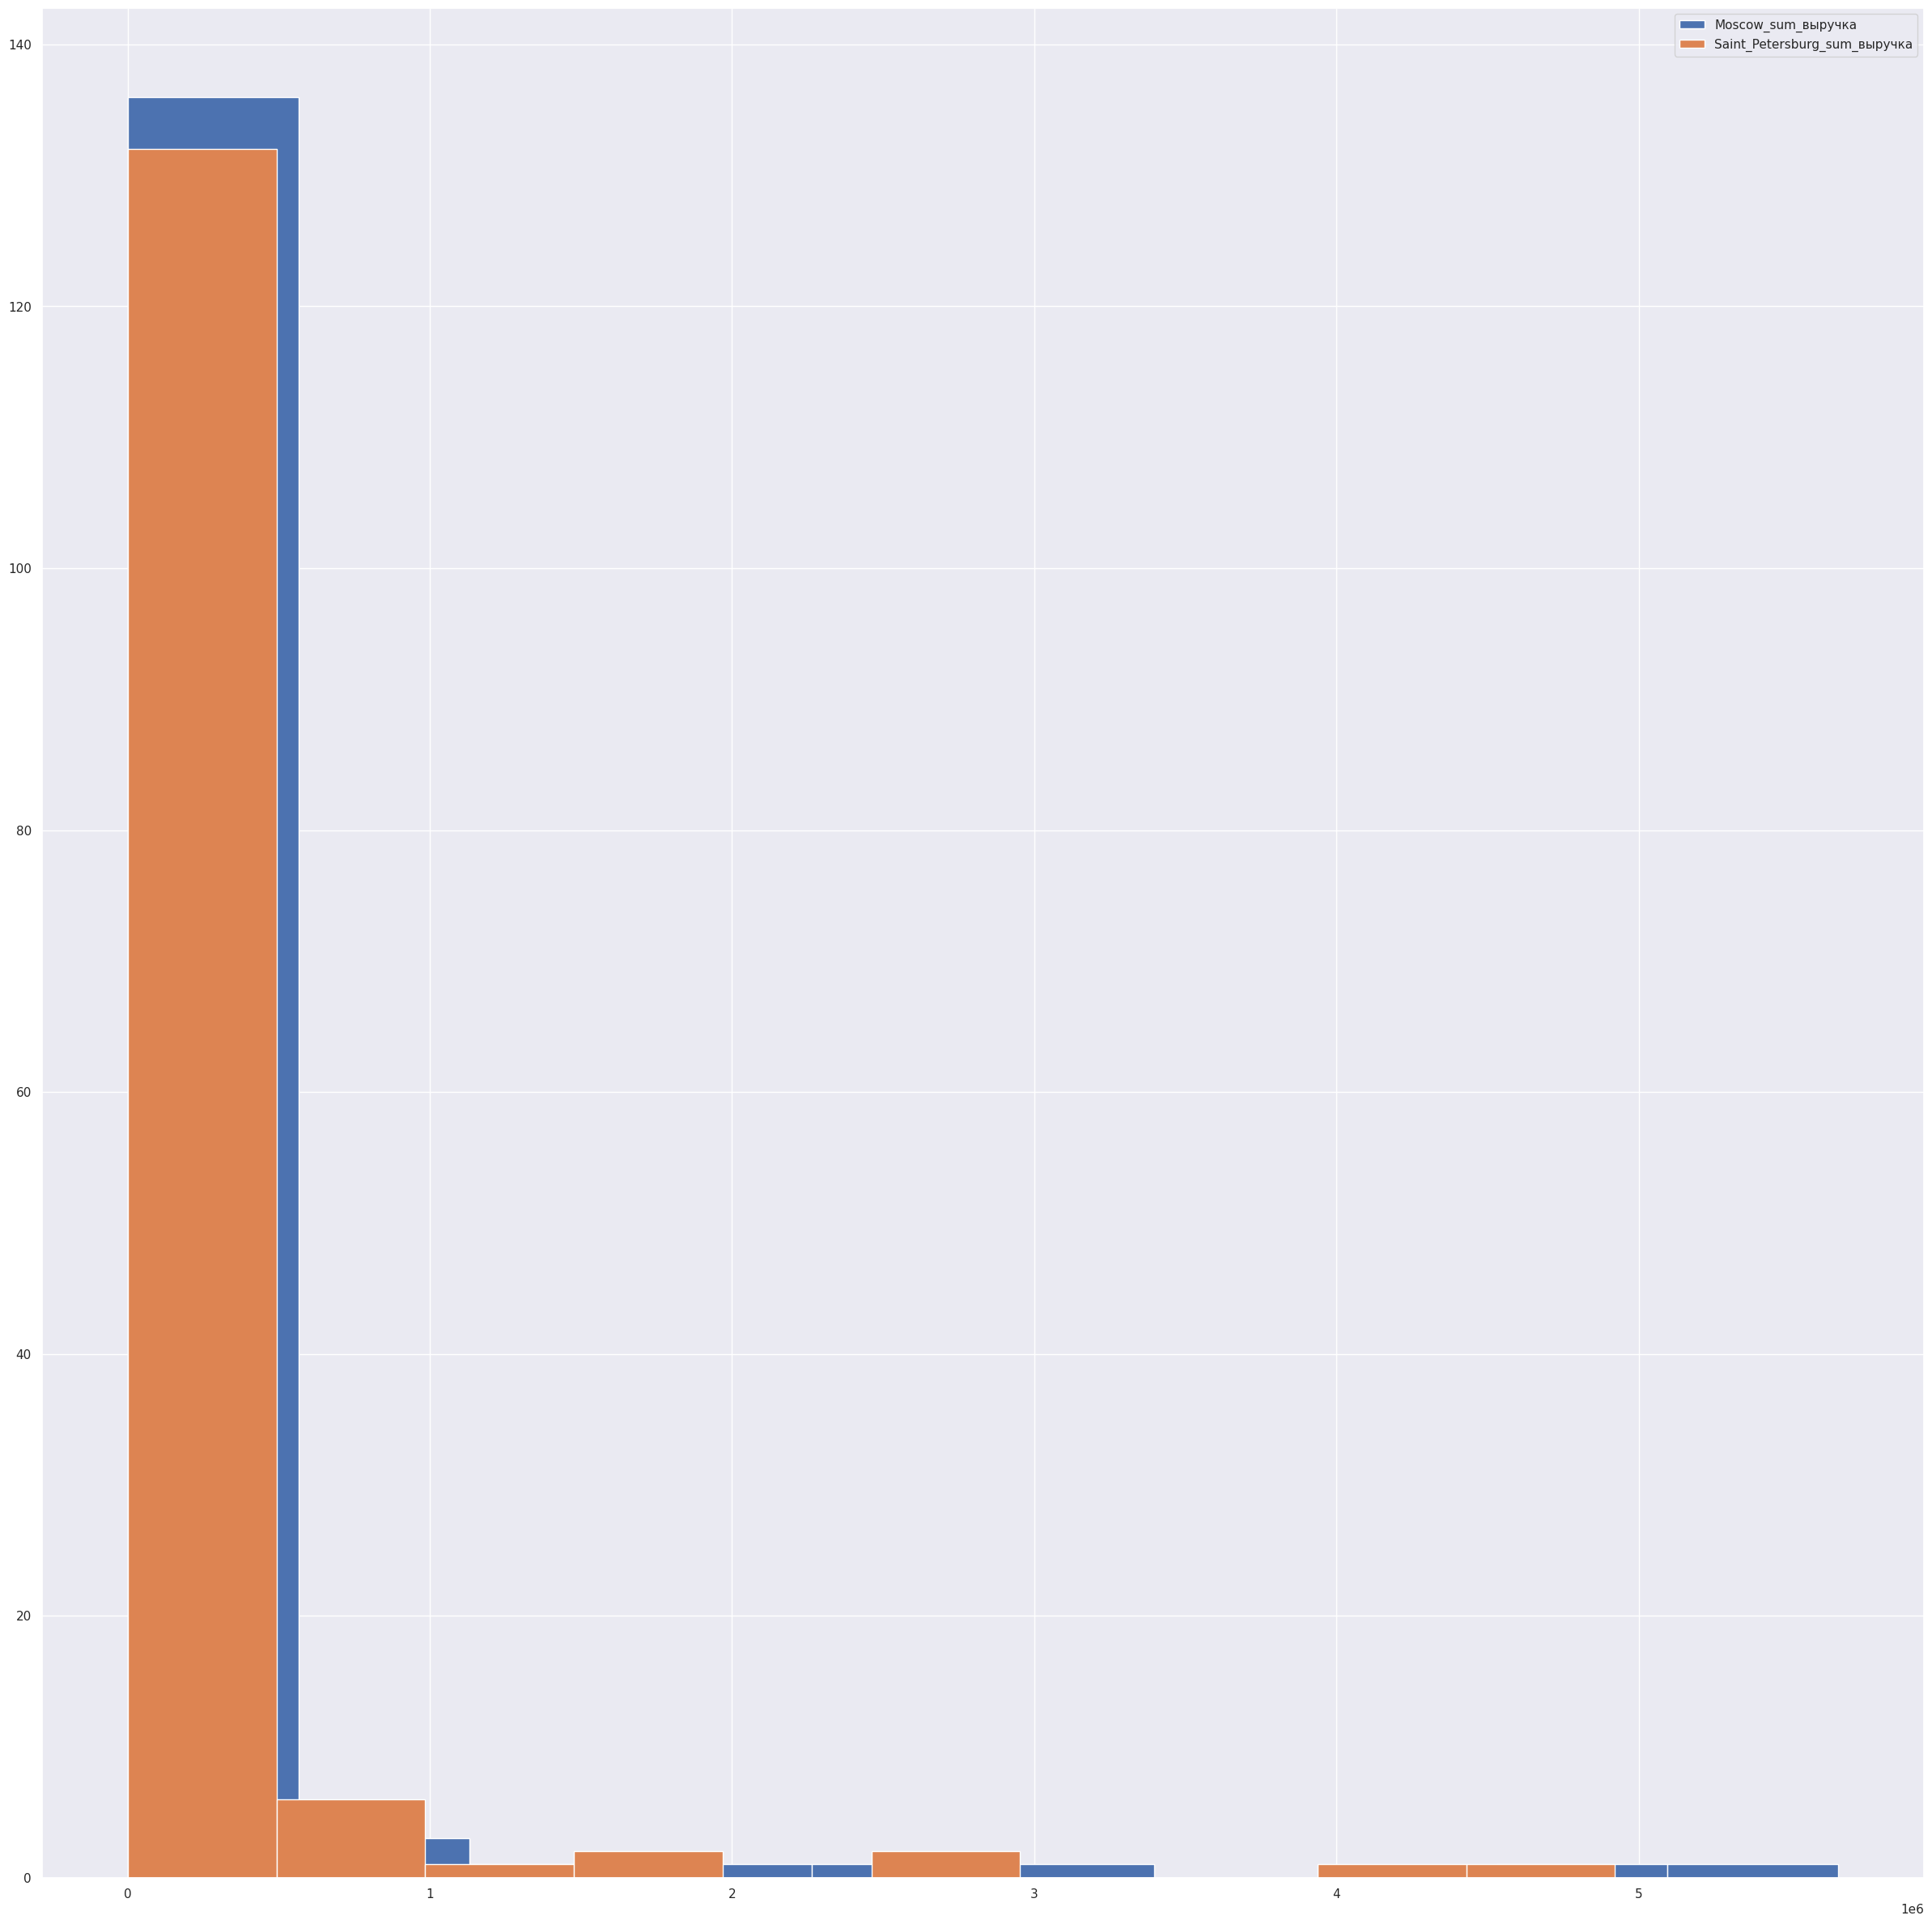

In [ ]:
# стоим гистограмму, чтобы увидеть распределение визуально

plt.hist(df_Moscow['sum_выручка'], bins=10, label = 'Moscow_sum_выручка');
plt.hist(df_Saint_Petersburg['sum_выручка'], bins=10, label = 'Saint_Petersburg_sum_выручка');
plt.legend()

Поверка на нормальность показала, что данные распределены не нормально, что также подтверждено визуально (гистограммой).

Поскольку данные распределены не нормально, то для проверки гипотезы можно использовать тест Манна-Уитни

In [ ]:
 # Тест Манна-Уитни

stat, p = st.mannwhitneyu (df_Moscow['sum_выручка'], df_Saint_Petersburg['sum_выручка'], alternative='two-sided')

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выручки компаний из Москвы и Санк-Петербурга не отличаются')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 10588.00000, p = 0.91635
Не отклоняем нулевую гипотезу, выручки компаний из Москвы и Санк-Петербурга не отличаются


Выводы:

Исходя из имеющихся данных и полученных на их основании результатов статистического теста, у нас есть основания полагать, что выручка не зависит от того, в каком городе находится компания - в Москве или Санк-Петербурге

Проведем альтернативную проверку. Преобразуем данные и после этого можно применять праметрические тесты (Т-тест Стьюдента)

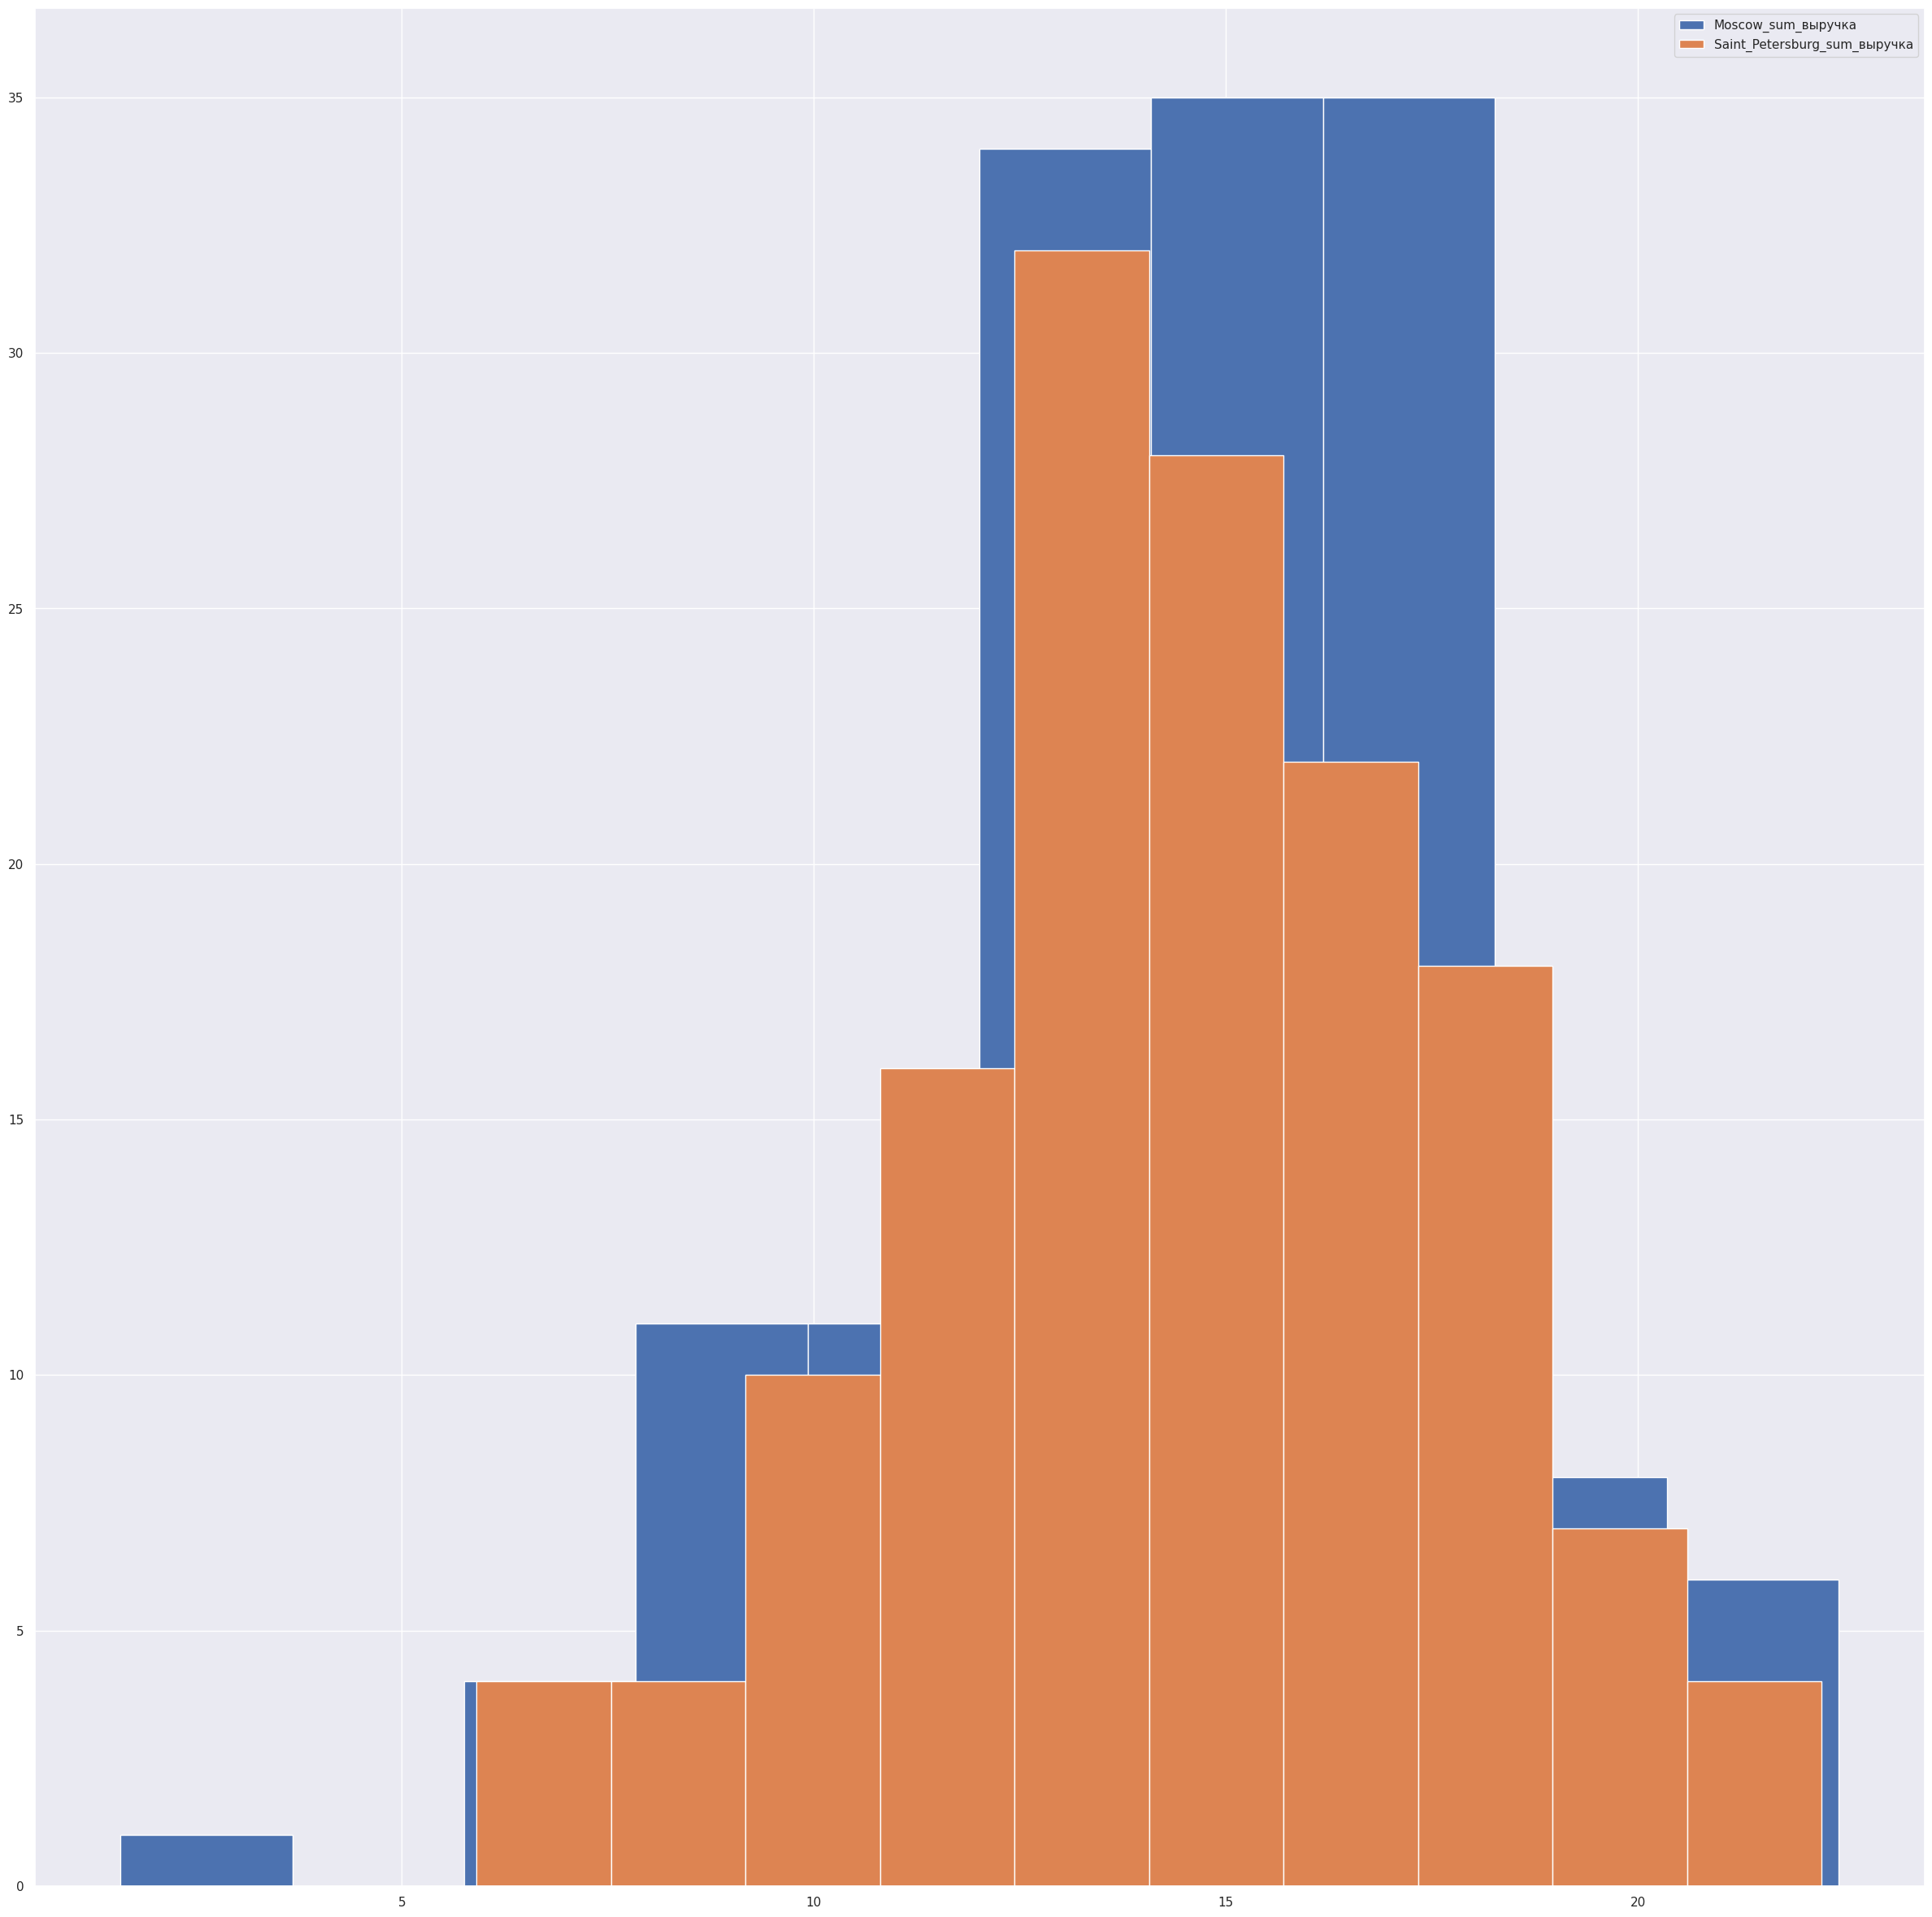

In [ ]:
norm = sorted(np.log2(df_Moscow['sum_выручка']))
norm_ = sorted(np.log2(df_Saint_Petersburg['sum_выручка']))

plt.hist(norm, bins=10, label = 'Moscow_sum_выручка');
plt.hist(norm_, bins=10, label = 'Saint_Petersburg_sum_выручка');
plt.legend()

In [ ]:
# Т-тест Стьюдента

stat, p = st.ttest_ind(norm, norm_)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выручки компаний из Москвы и Санк-Петербурга не отличаются')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = -0.15097, p = 0.88010
Не отклоняем нулевую гипотезу, выручки компаний из Москвы и Санк-Петербурга не отличаются


Альтернативная проверка также показала, что выручка не зависит от города (Москва и Санкт-Петербург)

Построим модель линейной регрессии, предсказывающую выручку исходя из численности компании

Для удобства оставим два коррелирующих столбца: "sum_выручка" и "Численность компании (мсп)"

In [ ]:
df_2 = df[['sum_выручка', 'Численность компании (мсп)']].reset_index()
df_2

,index,sum_выручка,Численность компании (мсп)
0,0,68849,2
1,1,21923,3
2,2,13362,1
3,3,7,0
4,4,2573,1
...,...,...,...
1763,1763,130899,13
1764,1764,75337,2
1765,1765,1550,0
1766,1766,249,0


Отфильтруем данные - уберем те строки, где численность компании равно нулю

In [ ]:
df_2 = df_2.sort_values('sum_выручка')
df_2

,index,sum_выручка,Численность компании (мсп)
481,481,1,0
640,640,1,1
199,199,3,1
1591,1591,5,1
574,574,6,0
...,...,...,...
1471,1471,8064380,129
663,663,8442274,589
164,164,13179740,216
880,880,19424684,90


In [ ]:
df_2 = df_2.loc[df_2['Численность компании (мсп)'] != 0].reset_index()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   level_0                     1407 non-null   int64
 1   index                       1407 non-null   int64
 2   sum_выручка                 1407 non-null   int64
 3   Численность компании (мсп)  1407 non-null   int64
dtypes: int64(4)
memory usage: 44.1 KB


In [ ]:
df_2

,level_0,index,sum_выручка,Численность компании (мсп)
0,640,640,1,1
1,199,199,3,1
2,1591,1591,5,1
3,1310,1310,15,2
4,620,620,25,1
...,...,...,...,...
1402,206,206,7815249,314
1403,1471,1471,8064380,129
1404,663,663,8442274,589
1405,164,164,13179740,216


Рассчитаем коэффициент корреляции Пирсона

In [ ]:
from scipy.stats.stats import pearsonr
pearsonr = pearsonr(df_2['sum_выручка'], df_2['Численность компании (мсп)'])
print('statistic=%.5f, pvalue=%.5f' %(pearsonr))

statistic=0.55979, pvalue=0.00000


<ipython-input-137-d91d932cc190>:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


Вывод:

Коэффициент корреляции – 0,55979, а двустороннее значение p – 0,000. Поскольку это значение p меньше 0,05, можно заключить, что существует статистически значимая корреляция между двумя переменными

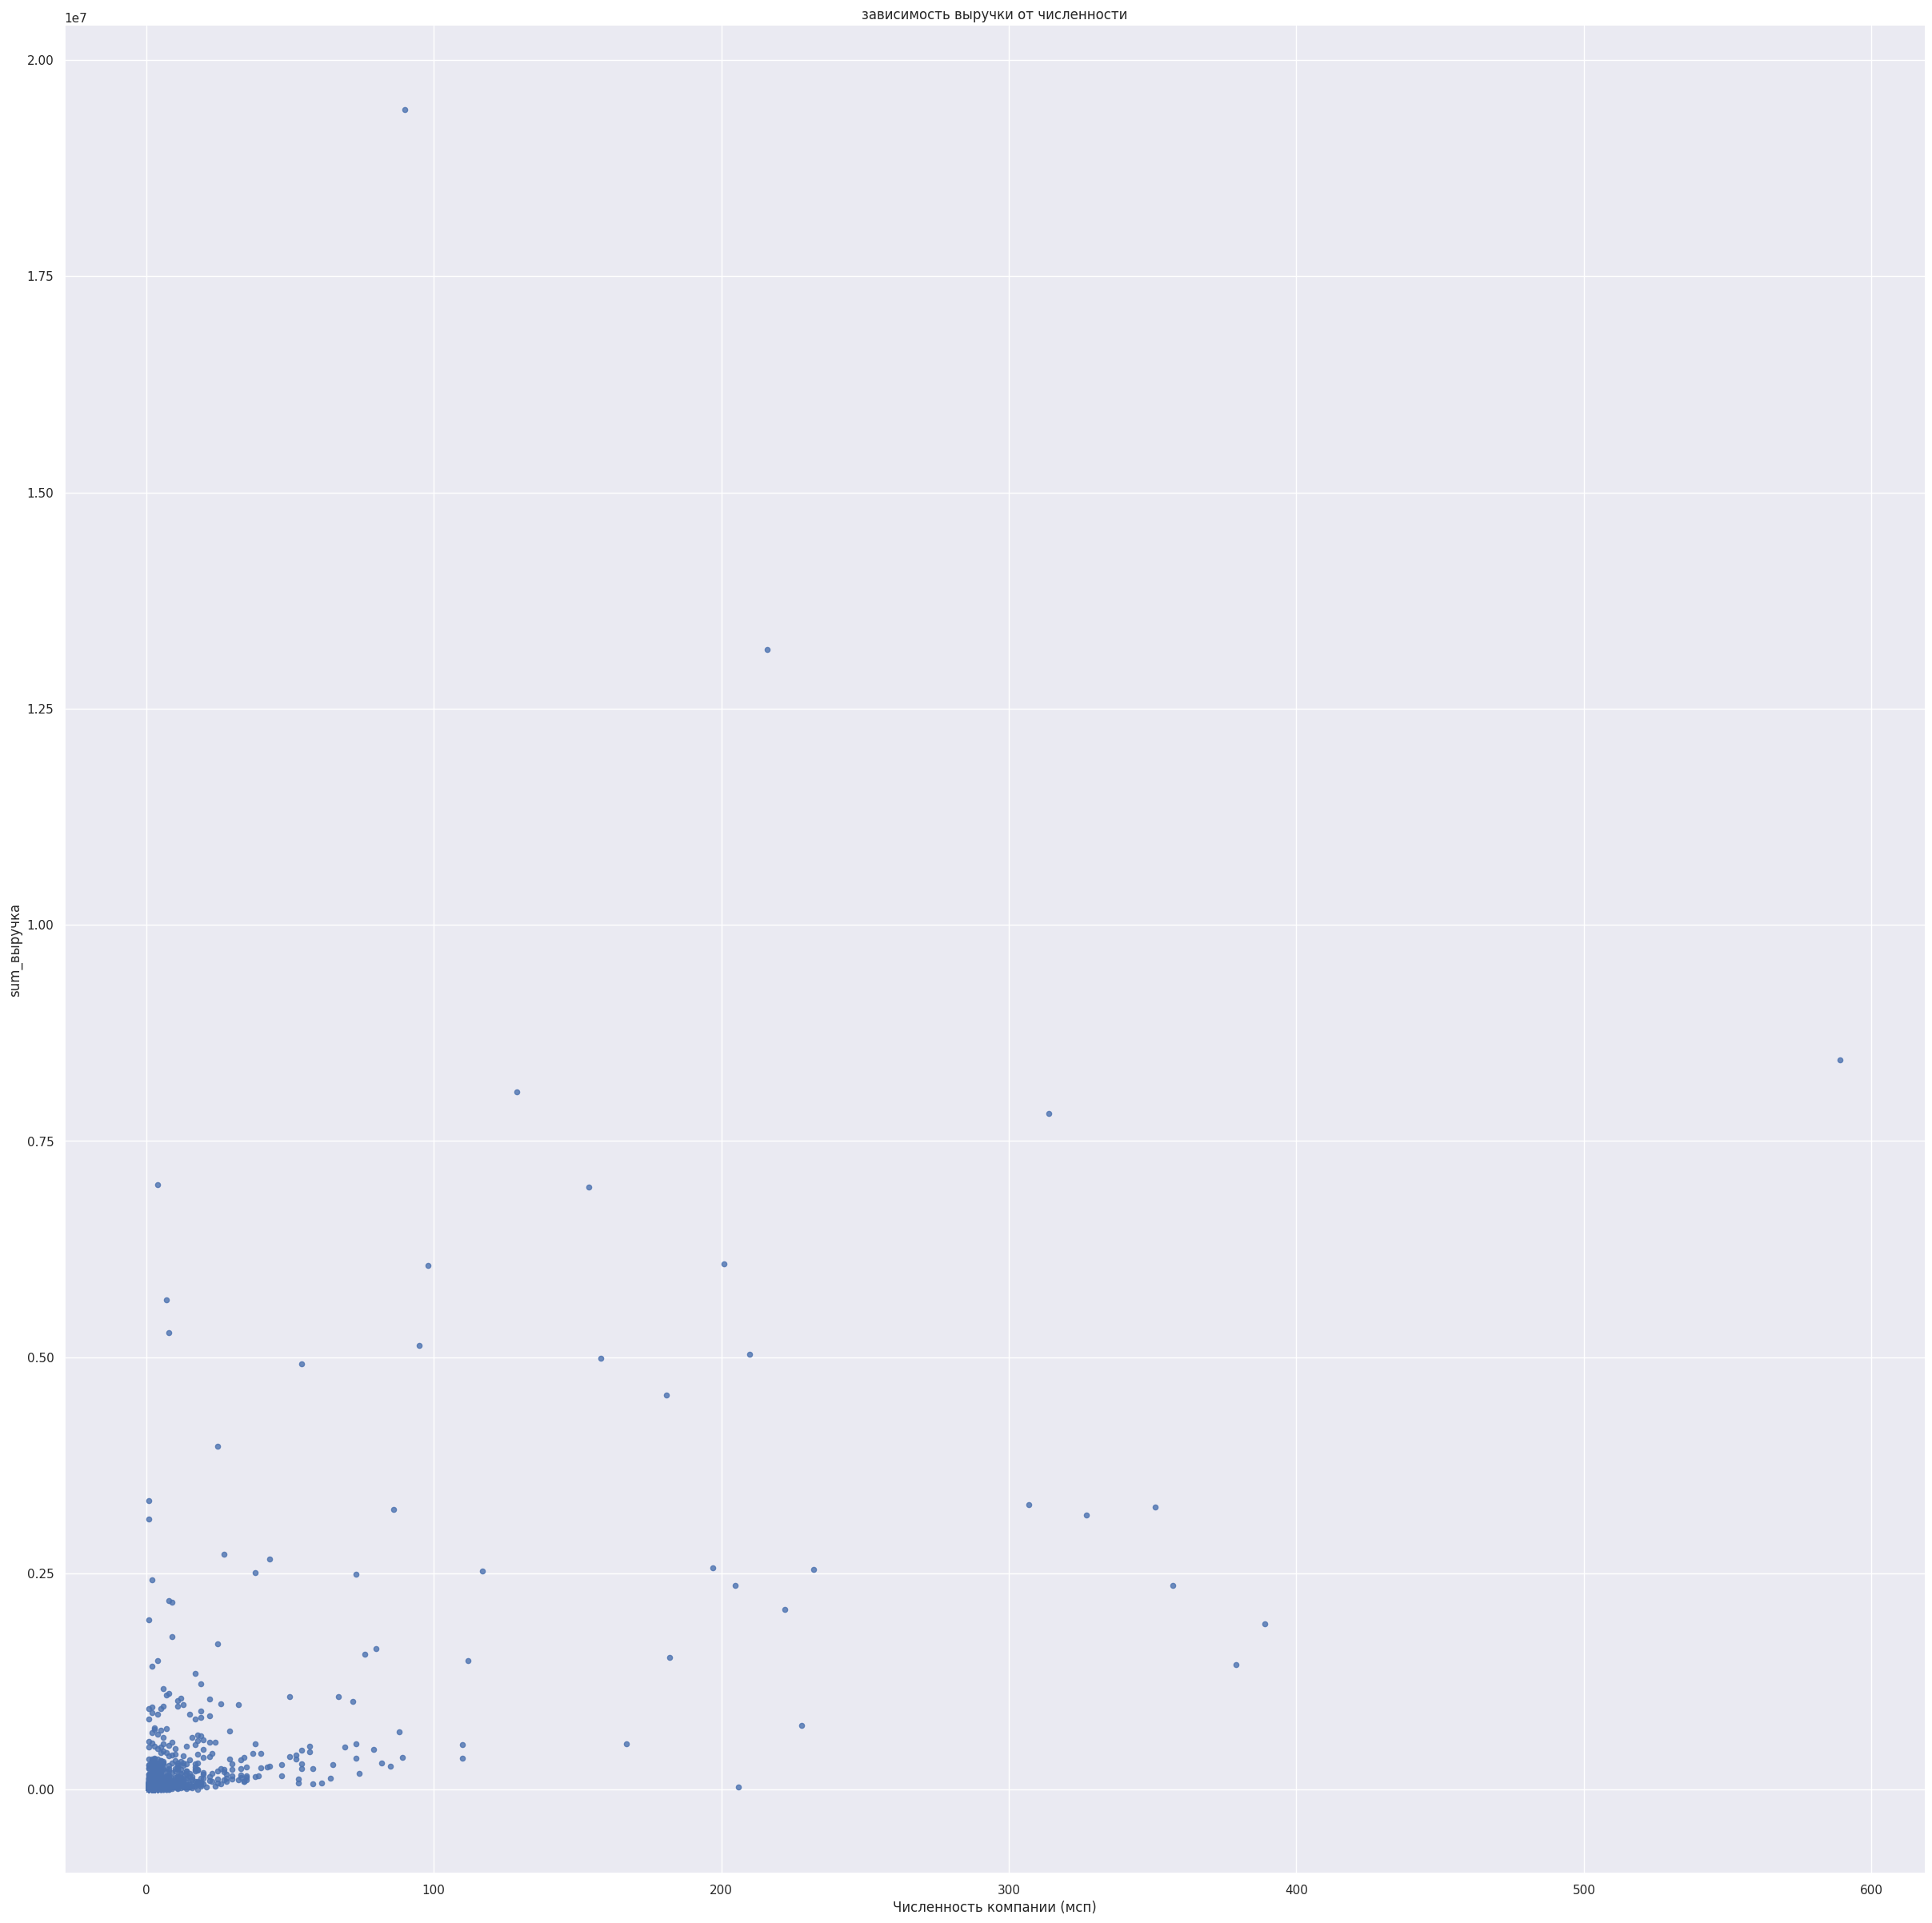

In [ ]:
# @title Численность vs sum_выручка

df_2.plot(kind='scatter', x='Численность компании (мсп)', y='sum_выручка', s=20, alpha=.8, title='зависимость выручки от численности')
plt.gca().spines[['top', 'right',]].set_visible(False)

Определим "Численность компании (мсп)" как признак Х, а "sum_выручка" - как целевую переменную

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df_2[['Численность компании (мсп)']]
y = df_2['sum_выручка']

Разделим выборку на тестовую и тренировочную

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(1125, 1)

In [ ]:
y_train.shape

(1125,)

Построим модель линейной регрессии

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_

array([14247.08998393])

In [ ]:
model.intercept_

61500.97177892263

In [ ]:
# y = 14247.08998393 * x + 61500.97177892263

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 118489.33171462,   89995.15174677,   75748.06176285,
         75748.06176285,  104242.2417307 ,   75748.06176285,
         75748.06176285,   75748.06176285,  161230.6016664 ,
         75748.06176285,   75748.06176285,  161230.6016664 ,
        218218.9616021 ,  118489.33171462,  218218.9616021 ,
        104242.2417307 ,  146983.51168247,   75748.06176285,
        146983.51168247,   75748.06176285,  132736.42169855,
         75748.06176285,   89995.15174677,   75748.06176285,
       1272503.62041256,  161230.6016664 ,  246713.14156995,
       1187021.08050901,  189724.78163425,   89995.15174677,
         75748.06176285,  517407.85126453,  203971.87161817,
         75748.06176285,   75748.06176285,  118489.33171462,
         75748.06176285,   75748.06176285,   75748.06176285,
         75748.06176285,   89995.15174677,  374936.95142528,
        132736.42169855,  118489.33171462,   89995.15174677,
         75748.06176285,   89995.15174677,  104242.2417307 ,
         75748.06176285,

In [ ]:
y_test

,sum_выручка
353,5599
864,49276
1161,179663
192,2045
782,34561
...,...
1000,86225
610,17058
188,2007
289,3968


In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.20519585638720483

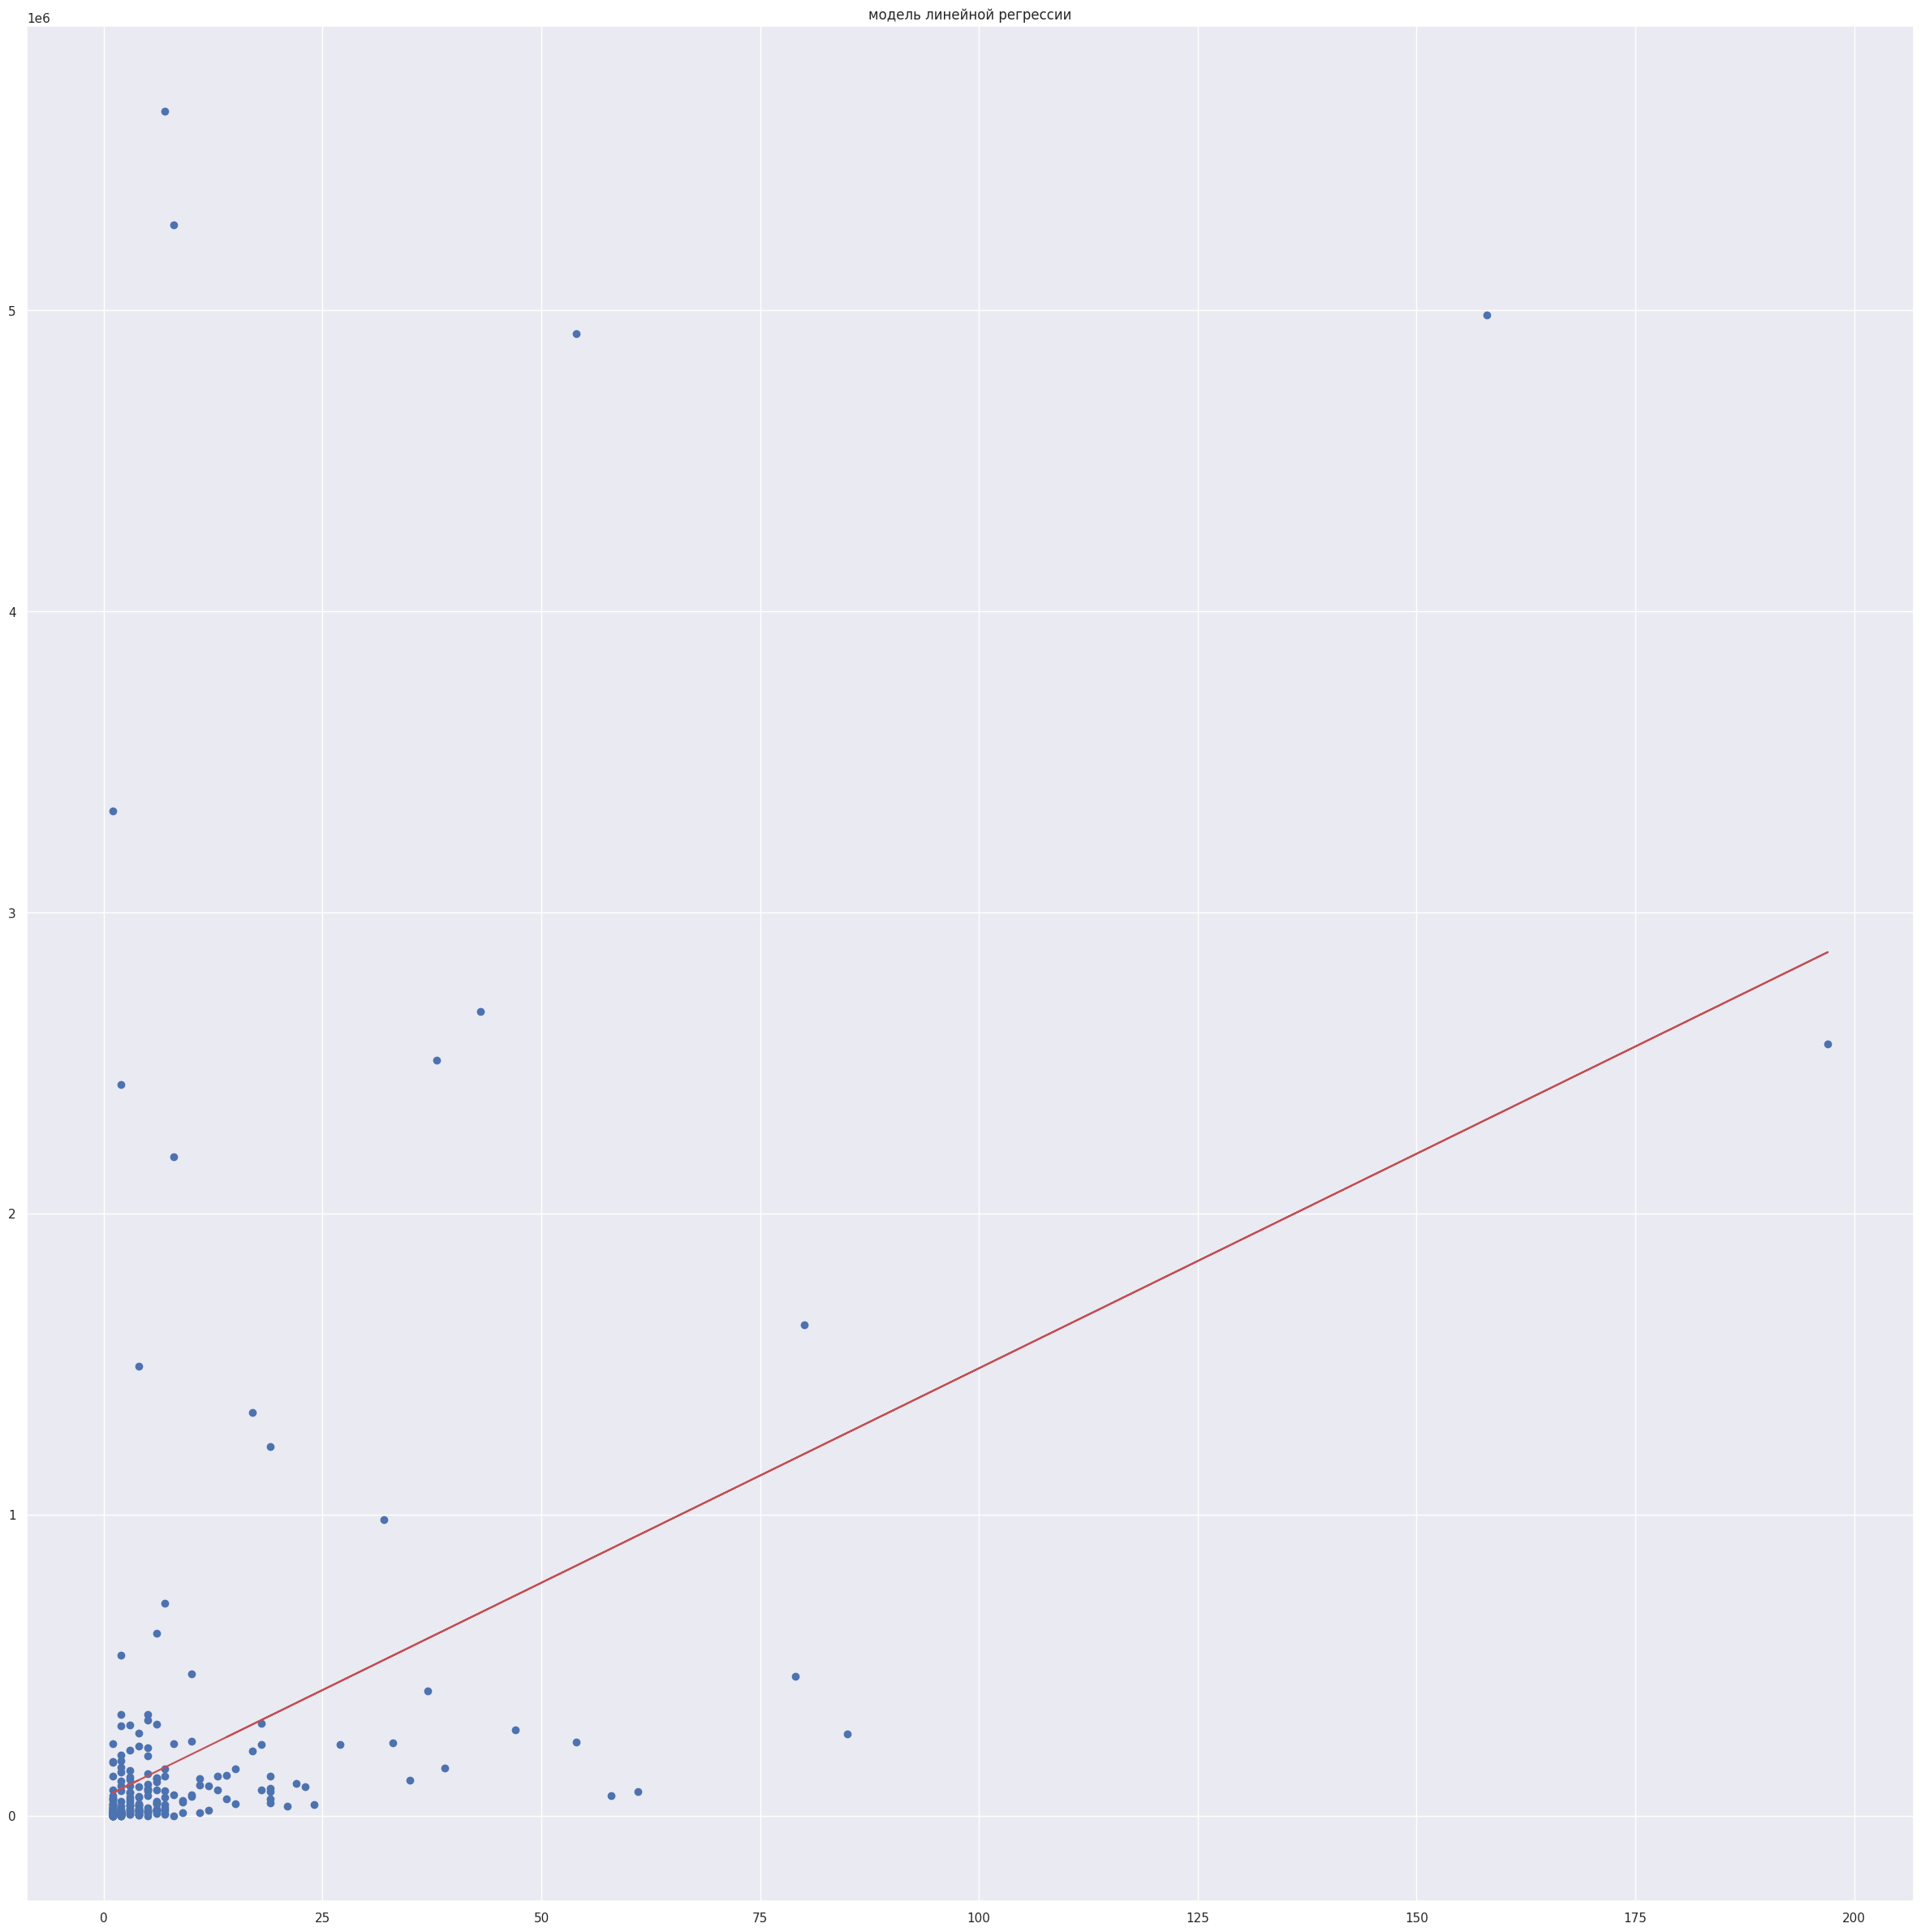

In [ ]:
plt.scatter(X_test, y_test)
plt.title('модель линейной регрессии')
plt.plot(X_test, y_pred, c='r')

Интерпретация коэффициентов

Для удобства составим DataFrame из коэффициентов обученной модели

In [ ]:
lr_df = pd.DataFrame({'Признаки': X_train.columns, 'Коэффициенты': model.coef_})

intercept_df = pd.DataFrame({'Признаки': ['Intercept'], 'Коэффициенты': model.intercept_})
coef_df = pd.concat([lr_df, intercept_df], ignore_index=True)
coef_df

,Признаки,Коэффициенты
0,Численность компании (мсп),14247.089984
1,Intercept,61500.971779


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Подбираем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)

# Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.18259957],
       [-0.14184688],
       [ 0.45713118],
       ...,
       [-0.14184688],
       [-0.14184688],
       [-0.09193204]])

In [ ]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_scaled

array([ 118489.33171462,   89995.15174677,   75748.06176285,
         75748.06176285,  104242.2417307 ,   75748.06176285,
         75748.06176285,   75748.06176285,  161230.6016664 ,
         75748.06176285,   75748.06176285,  161230.6016664 ,
        218218.9616021 ,  118489.33171462,  218218.9616021 ,
        104242.2417307 ,  146983.51168247,   75748.06176285,
        146983.51168247,   75748.06176285,  132736.42169855,
         75748.06176285,   89995.15174677,   75748.06176285,
       1272503.62041256,  161230.6016664 ,  246713.14156995,
       1187021.08050901,  189724.78163425,   89995.15174677,
         75748.06176285,  517407.85126453,  203971.87161817,
         75748.06176285,   75748.06176285,  118489.33171462,
         75748.06176285,   75748.06176285,   75748.06176285,
         75748.06176285,   89995.15174677,  374936.95142528,
        132736.42169855,  118489.33171462,   89995.15174677,
         75748.06176285,   89995.15174677,  104242.2417307 ,
         75748.06176285,

In [ ]:
lr_df = pd.DataFrame({'Признаки': X.columns, 'Коэффициенты': model_scaled.coef_})

intercept_df = pd.DataFrame({'Признаки': ['Intercept'], 'Коэффициенты': model_scaled.intercept_})
coef_df = pd.concat([lr_df, intercept_df], ignore_index=True)
coef_df

,Признаки,Коэффициенты
0,Численность компании (мсп),570855.900898
1,Intercept,227957.639111


Оценка модели

In [ ]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred_scaled)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred_scaled)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred_scaled)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_scaled))}')

R2: 0.20519585638720483
MAE: 226991.5330851331
MSE: 425327787570.9558
RMSE: 652171.5936553476


Посмотрим на остатки

<Axes: xlabel='sum_выручка', ylabel='Count'>

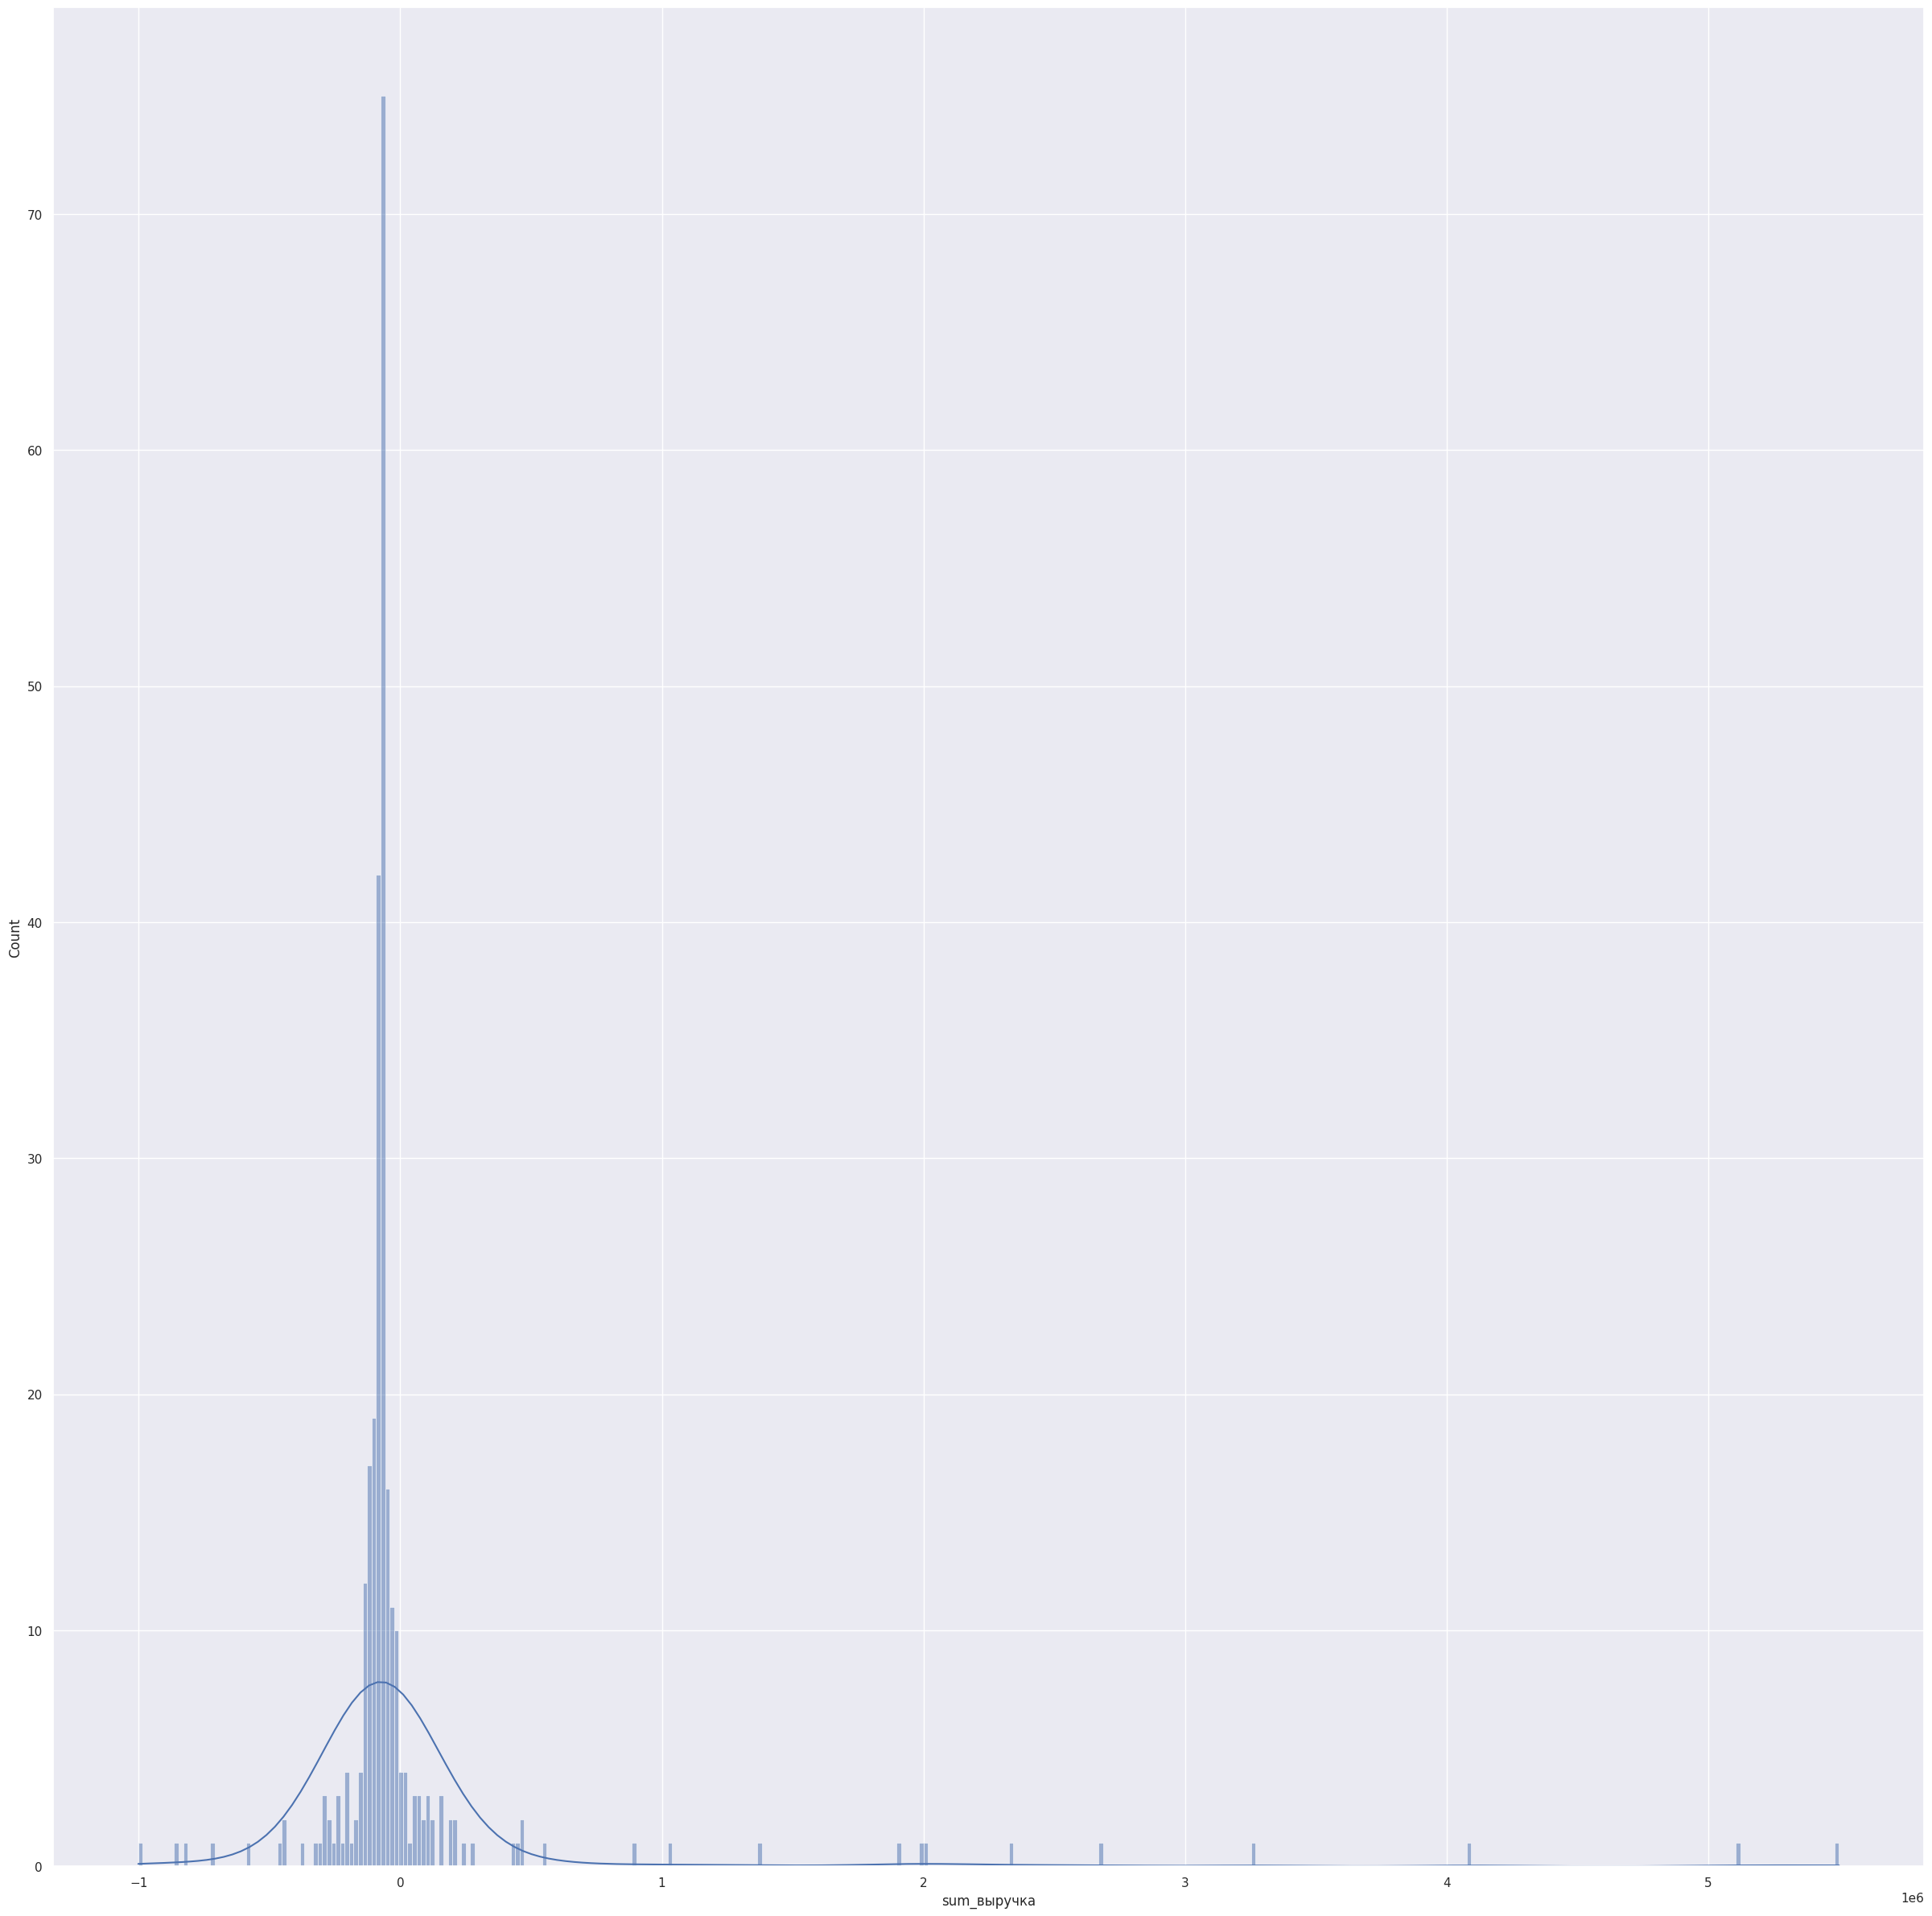

In [ ]:
sns.histplot((y_test-y_pred_scaled), kde=True)

Основные итоги проекта:
- проанализирован исходный файл с данными
- проведена работа с пропусками и выбросами
- с помошью визуализаций и статистических расчетов были проверены некоторые гипотезы
- с помошью статистических расчетов была опровергнута гипотеза, что выручка компаний не зависит от того, кто в ней руководитель (мужчина или женщина). Статистически есть различия между выручкой в компаниях, где руководитель мужчина и в компаниях, где руководитель женщина
- составлена и визуализирована с помощью тепловой карты корреляционная матрица числовых признаков набора данных
- проведен АВ-тест и проверена гипотеза, что выручка не зависит от города, где расположена компания (Моска или Санк-Петербург). Гипотеза подтвердилась. Статистически показано, что с точки зрения выручки нет разницы, в каком городе находится компания - в Москве или Санк-Петербурге
- построена модель линейной регрессии, предсказывающая выручку исходя из численности компании